<p align="left">
<img src="figures/Unipd_1.png"  width="300"/> </p>
<p align="left">

<div align="center"> <h2 align="center"> Dipartimento di Fisica e Astronomia "Galileo Galilei" </h2> </div>
<div align="center"> <h2 align="center"> Master degree in Physics of Data</h2> </div>
<div align="center"> <h2 align="center"> Laboratory of Computational Physics, module A </h2> </div>
<div align="center"> <h2 align="center"> Amjadi Bahador, Attar Aidin, Baci Ema, Keshavarzmirzamohammadi Melika </h2> </div>
<br>
<br>

# Volatility Carry Trading Strategy
Volatility is one of the standard measures of risk in financial markets. From a statistical point of
view, volatility is the annualized standard deviation of the yield of an underlying asset.

## Table of contents:
- [Introduction](#Introduction)

- [Theoretical Framework](#intro)

    - [What are Options?](#options)
    - [Volatility of the Stock Price](#VolS)
    - [Brownian Motion model of Stock Price](#BMS)
    - [Black-Scholes Model](#BS_Model)
    - [CIR process](#CIR)
    - [Heston Model](#H_Model)
- [What is our Goal?](#Goal)
- [Modelling the implicit volatility](#Implicit_Vol)
- [Creating signals for opening/closing short position](#Signal)
- [Estimation of the \"confidence\" value](#Confidence)
- [Data Structure](#Data)

## Introduction<a class="anchor" id="Introduction"></a>

Volatility is one of the standard measures of risk in financial markets. [From a statistical point of view, volatility is the annualized standard deviation of the yield of an underlying asset.] Technically, there are two kinds of volatlities; *Historical volatility* which is obtaied through historical data on of an index, and *Implied Volatilty* which is estimated using statistical models and option prices. Implied Volatility shows the expectations of the market on the volatility of the underlying asset from now until the date of expiry.

In this project, we try to model the implicit volatility, using statistical models. More preciesly, we try to estimate a specific kind of Implied Volatlity which is *VIX*. The CBOE Volatility Index, or VIX, represents market's expectations for volatility over the coming 30 days or 60 days. Investors use the VIX to measure the level of risk, fear, or stress in the market when making investment decisions. Once a rigid estimate of VIX has been made, we try to create signals which tells when to open/close short postition.

Finally, we try to obtain a value which represents our \"Confidence\" when deciding to invest when some specific in presence specific volatilty conditons.

## **Theoretical Framework** <a class="anchor" id="intro"></a>
In this section, we discuss the theoretical framework which is essential to carry out the project.

### **What are Options?** <a class="anchor" id="options"></a>

Options are contracts that give the bearer the right, but not the obligation, to either buy or sell an amount of some underlying asset at a predetermined price at or before the contract expires.

Depending on the situation, there is usually an option scenario appropriate for an investor’s goal. A popular example would be using options as an effective hedge against a declining stock market to limit downside losses.\
Options belong to the larger group of securities known as derivatives. A derivative's price is dependent on or derived from the price of something else.


#### **Call and Put Options**

Options are a type of derivative security. An option is a derivative because its price is intrinsically linked to the price of something else. If you buy an options contract, it grants you the right but not the obligation to buy or sell an underlying asset at a set price on or before a certain date.

A call option gives the holder the right to buy a stock and a put option gives the holder the right to sell a stock. Think of a call option as a down payment on a future purchase and a put option as an insurance policy.

There are four things you can do with options:

    1. Buy (long) calls
    2. Sell (short) calls
    3. Buy (long) puts
    4. Sell (short) puts
Buying stock gives you a long position. Buying a call option gives you a potential long position in the underlying stock. Short-selling a stock gives you a short position. Selling a naked or uncovered call gives you a potential short position in the underlying stock.

Buying a put option gives you a potential short position in the underlying stock. Selling a naked or unmarried put gives you a potential long position in the underlying stock. Keeping these four scenarios straight is crucial.

People who buy options are called holders and those who sell options are called writers of options.

<p align="left">
<img src="figures/call option1.png"  width="750"/> </p>
<!-- <img src="figures/put option.png"  width="500"/> </p> -->
<p align="left"> 

# Brownian Motion(random walk)<a class="anchor" id="BMS"></a>


Brownian motion describes movements of a particle which are caused by small shocks from other particles. The particle shows two types of movements:

    1.drift: as it is depicted, this movement causes the particle to go away from the first position.
    2.fluctuation: the uncertainty or the noise of the movement, that sometimes can change the whole direction of drift movements.



$${dx}= {adt}+{bdz}$$

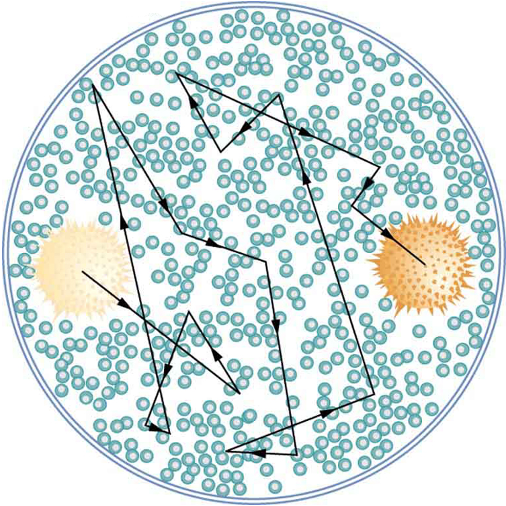

In [57]:
from IPython.display import Image
Image('figures/p.png', width= 200, height = 100)

# Volatility

Volatility often refers to the amount of uncertainty or risk related to the size of changes in a security's value. A higher volatility means that a security's value can potentially be spread out over a larger range of values. This means that the price of the security can change dramatically over a short time period in either direction. It is calculated as standard deviation from expected price.

If we scrutinize stock price trajectories, we understand that the stock prices follow the uncertain fashion as well.

### Brownian Motion model of Stock Price
A widely used model for the stock price behaviour is the ***Geometric Brownian Motion (GBM)*** model of stock price:
<br>

$$dS =\mu Sdt+\sigma Sdz$$ 
or in its more formal shape:
$$ \frac{dS}{S} = \mu dt+\sigma dz$$

S: Stock Price <br>
$\mu$: Stock's expected rate of return  <br>
$\sigma$ : Volatility of the Stock Price
Which, From the point of view of physics, is called a ***Generalized Wiener Process***. a process in which The mean change per unit time for a stochastic process is known as the drift rate and the variance per unit time is known as the variance rate.
<br>
<br>
<p align="left">
<img src="figures/GWP.png"  width="700"/> </p> 
<p align="left">
    
Notice: The stock price itself does not follow a generlaized wiener process. we need to normalize the change in stock price at each time w.r.t the stock price in that time. In other words, the variable that satisfies the generalized wiener process equation is the change of stock price in time t, over the stock price in the same time, which is called ***Return***:

#  Ito's Lemma

For each variable like x  that follows brownian motion, a function like C, which is a function of x and time, follows brownian motion as well:

$${dx}= {adt}+{bdz}$$

$$
{dC}=\displaystyle \bigg [\frac{\partial C}{\partial x}{a}+\frac{\partial C}{\partial t}+ {1/2}\frac{\partial^{2} C}{\partial x^{2}}{b^{2}}\bigg]{dt} + \frac{\partial C}{\partial x}{b}{dz}
$$

###### As it can be seen the variable C again has two terms; drift rate, and variance rate.

If we go back to option pricing again, C can be fitted to call option price which is a function of stock price (or the underlying asset) and time. This results to the fact that call option prices follow brownian motion too.

## Black-Schoels Model

In 1997, Scholes, Black, and Merton were awarded the Nobel Price because of finding a function that not only does it well describe the call option pricing based on the stock price at current time, but also it is a perfect solution to Ito Lemma's equation.

In the Derivation of Black-Scholes formula, there are some basic assumptions about the market that had been taken into account:
1. No dividends are paid out during the life of the option.

2. Markets are random(market movements cannot be predicted).

3. There are no transaction costs in buying the option.

4. The volatility of the underlying asset is constant.

5. The option is European.


###### The so called Black and Scholes formula for option pricing:


$$
{C}= {S}_{t} {N({d}_{1})} - {K} e^{-rt} {N({d}_{2})}
$$

where : 

$${d}_{1}=\frac{\ln\frac{{S}_{t}}{K} + (r + \frac{{\sigma}_{v}^2}{2})t}{{{\sigma}_{s}}{\sqrt {t}}}
$$

and

$$
{d}_{2}= {d}_{1} - {{\sigma}_{s}}{\sqrt {t}}
$$



where : 

###### C = Call option price
###### S = Current stock price
###### K = Strike price 
###### r = Risk-Free interest rate
###### t = Time to maturity
###### N = A normal distribution




one of the well-accepted strategies to show the market wellbeing is to plot volatility. stock market scientists usally use Black and Scholes model to derive the volatility rather than the option price itself. option price is usually derived from other models and used in Black and Sholes model to plot **Implied Volatility**.

### The most important drawback of Black and Sholes model:

The volatility obtained from model above is constant for every maturity time, which does not square with reality.

That is why we introduce a finer model with more parameters to introduce a volatility that changes over time and gives the investers a better clue about the changes of option prices.

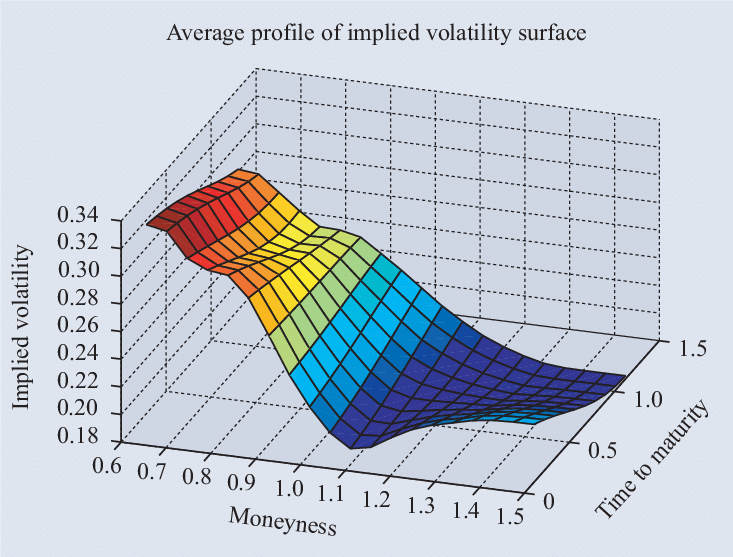

In [1]:
from IPython.display import Image
Image('figures/m.png') #I don't find anymore the image in the folder

# Heston Model

The Heston Model, developed by associate finance professor Steven Heston in 1993, is an option pricing model that can be used for pricing options on various securities. Quite opposite to the Black and Scholes model, This model uses a type of volatility **(Stochastic Volatility)** that changes over time.

##### what is Stochastic volatility
stochastic means the volatility is quite arbitary and random, this means in Heston model we are going to consider a distribution function for deriving this random numbers. this random numbers does not depend on past experiences theonly thing that they are dependent on is the current number. Therefore, we can conclude our volatility follows brownian motion as well.

#### Heston formula

$$ {dS}_{t} = {r}{S}_{t}{dt} + \sqrt {V}_{t} {S}_{t} {dW}_{1t}$$

and :

$$ 
{dV}_{t} = k({\theta}- {V}_{t}){dt} + {\sigma}{\sqrt {V}_{t}{dW}_{2t}}
$$




the aforementioned volatility follows stochastic process, it means it is randomely chosen from a distribution function with expectation of  ${k}({\theta} - {V}_{t}){dt}$  and STD of  ${\sigma}{\sqrt {V}_{t}}{dW}_{2t}$ .

# What's the Goal?

The main goals of the project is listed as below:


### 1. Modelling the implicit volatility
### 2.  Creating signals that tell us when to open and close short positions
### 3. Estimation of the confidence we have about opening a position


# Data Structure<a class="anchor" id="Data"></a>

In the following is reported an analysis of the volatility index (VIX) concerning the Standard & Poor’s 500, the most important North American stock index and the main equity benchmark for Wall Street listed stocks,
in particular we made a parallel anaysis for the first (UX1) and second future (UX2).

Our analysis is based on the Heston Model, that we used to compute the predicted volatility for the following day, then we implement two different investing strategy and compute the profit for both the two strategies.

To implement the Heston Model we used two different techiques to discretize the differential equation: the Euler method and the Milstein method.

# The Code

In [59]:
import numpy             as np
import matplotlib.pyplot as plt
import scipy             as sp
import seaborn           as sns
import pandas            as pd

import numpy.random      as npr

from   matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import matplotlib.dates  as     mdates
from   datetime          import datetime, date, timedelta
from   scipy             import optimize
from   scipy             import stats
from   scipy             import integrate
import datetime
import copy
import warnings

warnings.filterwarnings('ignore')

npr.seed(12345)

%matplotlib inline

#### Reading data

We used the function `read_excel` of the `pandas` library to create two dataframe for the datasets containing the first and the second future values of the VIX.
Then, since we have a value for each date we set the date itself as index of the dataframe.

In [60]:
dir       = 'data/'
file_name = 'grid1_zheb51fo.xlsx'

UX1       = pd.read_excel(dir+file_name, sheet_name='UX1_Index')
UX2       = pd.read_excel(dir+file_name, sheet_name='UX2_Index')
UX1       = UX1.set_index('Date')
UX2       = UX2.set_index('Date')

UX1.sort_index(inplace=True)
UX2.sort_index(inplace=True)

UX1

,PX_LAST,PX_VOLUME
Date,,
2010-01-04,24.8500,3138
2010-01-05,24.4500,1936
2010-01-06,23.5500,1958
2010-01-07,23.1500,1760
2010-01-08,22.5500,2050
...,...,...
2022-01-12,20.9713,76675
2022-01-13,22.0944,82700
2022-01-14,21.7462,102849


We downloaded historical data of SPX price found at https://www.wsj.com/market-data/quotes/index/SPX/historical-prices.

In [61]:
file_name         = 'SPX_HistoricalData.csv'
SPX_price         = pd.read_csv(dir+file_name)
SPX_price['Date'] = pd.to_datetime(SPX_price['Date'],format='%m/%d/%y')
SPX_price         = SPX_price.set_index('Date')
SPX_price.sort_index(inplace=True)
SPX_price

,Open,High,Low,Close
Date,,,,
2010-04-01,1171.23,1181.43,1170.69,1178.10
2010-04-05,1178.71,1187.73,1178.71,1187.44
2010-04-06,1186.01,1191.80,1182.77,1189.44
2010-04-07,1188.23,1189.60,1177.25,1182.45
2010-04-08,1181.75,1188.55,1175.12,1186.44
...,...,...,...,...
2022-01-10,4655.34,4673.02,4582.24,4670.29
2022-01-11,4669.14,4714.13,4638.27,4713.07
2022-01-12,4728.59,4748.83,4706.71,4726.35


##### Graphical visualization of data

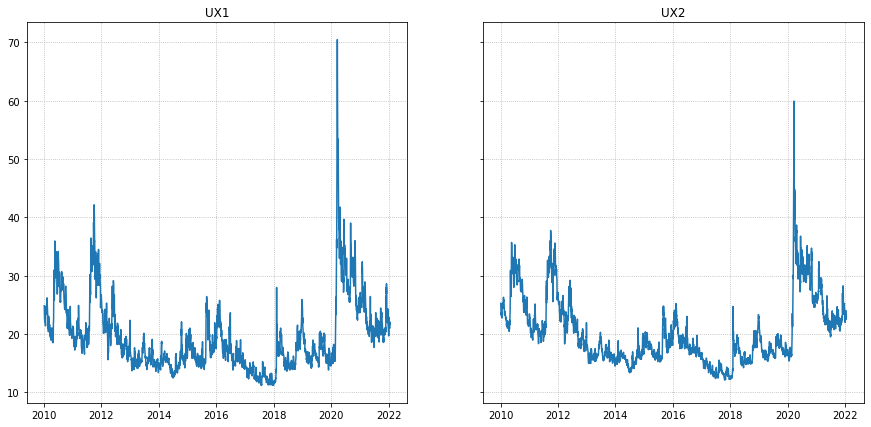

In [62]:
fig,ax = plt.subplots(ncols=2, figsize=(15,7), sharey=True)
ax[0].plot(UX1.index, UX1.PX_LAST)
ax[1].plot(UX2.index, UX2.PX_LAST)
ax[0].set_title('UX1')
ax[1].set_title('UX2')
ax[0].grid(linestyle='dotted')
ax[1].grid(linestyle='dotted')
plt.show()

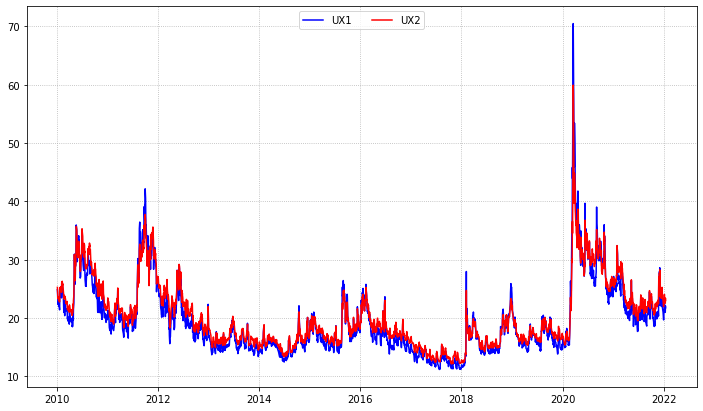

In [63]:
fig,ax = plt.subplots(figsize=(12,7))
ax.plot(UX1.index, UX1.PX_LAST, label='UX1', color='blue')
ax.plot(UX2.index, UX2.PX_LAST, label='UX2', color='red')
ax.legend(loc='upper center', ncol=2)
ax.grid(linestyle='dotted')
plt.show()

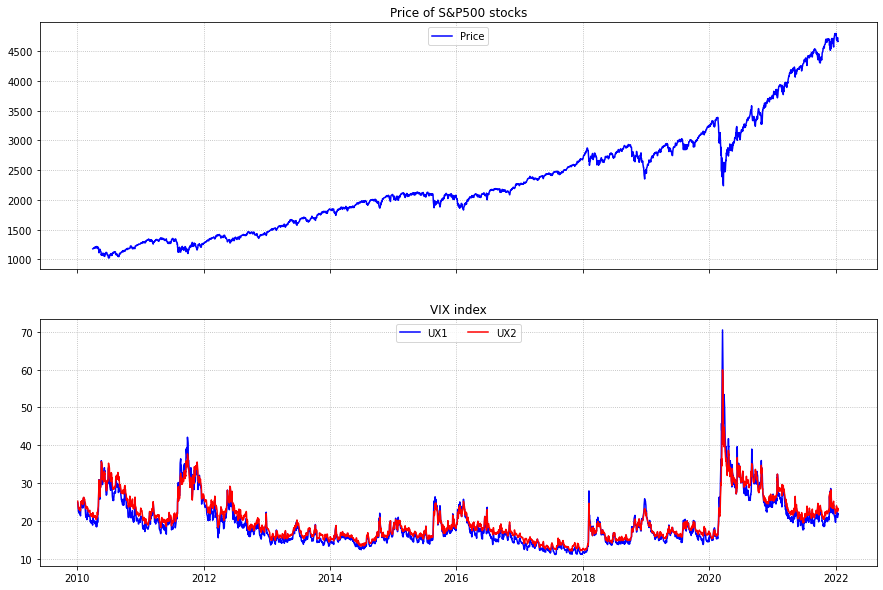

In [64]:
fig,ax = plt.subplots(nrows=2,figsize=(15,10), sharex=True)
ax[0].plot(SPX_price.index, SPX_price.Close, label='Price', color='blue')
ax[0].legend(loc='upper center', ncol=2)
ax[0].grid(linestyle='dotted')
ax[0].set_title('Price of S&P500 stocks')

ax[1].plot(UX1.index, UX1.PX_LAST, label='UX1', color='blue')
ax[1].plot(UX2.index, UX2.PX_LAST, label='UX2', color='red')
ax[1].legend(loc='upper center', ncol=2)
ax[1].grid(linestyle='dotted')
ax[1].set_title('VIX index')
plt.show()

We immediately see how a spike in the VIX values corresponds generally to a fall in SPX prices.

## Heston model solution
The Heston model is described by the bivariate stochastic process for the stock price $S_t$ and its variance $v_t$

$$ {dS}_{t} = {r}{S}_{t}{dt} + \sqrt {V}_{t} {S}_{t} {dW}_{1t}$$

$$ {dV}_{t} = k({\theta}- {V}_{t}){dt} + {\sigma}{\sqrt {V}_{t}{dW}_{2t}}$$

where $E[dW_{1,t}, dW_{2,t}] = \rho dt$

We simulate St over the time interval $[0;T]$, which we assume to be is discretized as $0 = t_1 < t_2 < ... < t_m = T$, where the time increments are equally spaced with width dt.
Integrating dSt from $t$ to $t + dt$ produces

$$S_{t+dt} = S_t + \int^{t+dt}_t \mu(S_u, u) du + \int^{t+dt}_t \sigma(S_u, u) dW_u $$

The previous equation is the starting point for any discretization scheme. At time $t$, the value of $S_t$ is known, and we wish to obtain the next value $S_{t+dt}$.

### Euler scheme
This is equivalent to approximating the integrals using the left-point rule. Hence the first integral is approximated as the product of the integrand at time $t$, and the integration range $dt$

$$\int^{t+dt}_t \mu(S_u, u) du \simeq \mu(S_t, t) \int^{t+dt}_t du = \mu(S_t,t)dt $$

In an identical fashion, the second integral is approximated as

$$  \int^{t+dt}_t \sigma(S_u, u) dW_u \simeq \sigma(S_t, t)  \int^{t+dt}_t dW_u = \sigma(S_t, t) (W_{t+dt} - W_t) = \sigma(S_t, t) \sqrt{dt}Z $$

with Z standard distributed variable.

The SDE for $v_t$ in the Heston model in integral form is

$$ v_{t+dt} = v_{t} + \int_t^{t+dt}\kappa(\theta - v_u)du + \int_t^{t+dt}\sigma\sqrt{v_u}dW_{2,u} $$

which becomes

$$v_{t+dt} = v_t + \kappa(\theta-v_t)dt+\sigma \sqrt{v_t dt}Z_v$$

On the other hand, using the Ito's Lemma we obtain

$$ S_{t+dt} = S_t + \exp{\left(\left(r - \frac{1}{2}v_t\right)dt + \sqrt{v_t dt}Z_s\right)}$$

where it is ecessary to replace $v_t$ with $|v_t|$ to avoid negative varinaces.

### Milstein scheme

The key to the Milstein scheme is that the accuracy of the discretization is increased by considering expansions of the coefficients $\mu_t = \mu( St )$ and $\sigma_t = \sigma( S_t )$ via Itō’s lemma.

We obtain

$$v_{t+dt} = v_t + \kappa(\theta-v_t)dt+\sigma \sqrt{v_t dt}Z_v + \frac{1}{4}\sigma^2dt(Z_v^2 - 1)$$

$$ S_{t+dt} = S_t + \exp{\left(\left(r - \frac{1}{2}v_t\right)dt + \sqrt{v_t dt}Z_s\right)}$$

We start by selecting a common period of time for the three sets of data.

In [65]:
start     = '2010-04-05'
stop      = '2022-01-10'
mask      = ( UX1.index       >= start ) & ( UX1.index       < stop )
UX1       =   UX1[      mask]
mask      = ( UX2.index       >= start ) & ( UX2.index       < stop )
UX2       =   UX2[      mask]
mask      = ( SPX_price.index >= start ) & ( SPX_price.index < stop )
SPX_price =   SPX_price[mask]

UX1       = UX1.drop(UX1.drop(SPX_price.index).index)
UX2       = UX2.drop(UX2.drop(SPX_price.index).index)

In [66]:
def heston_pde_euler( S_0,          r,     k,  theta,
                      v_0, rho, sigma, steps, Npaths ):
    '''Euler scheme for Heston model PDE'''
    dt         = 1 / 252 / steps
    size       = ( Npaths, steps )
    prices     = np.zeros(         size )
    volatility = np.zeros(         size )
    S_t        = np.full ( Npaths,  S_0 )
    v_t        = np.full ( Npaths,  np.abs( v_0 ) )
    for t in range( steps ):
        WT  = np.sqrt( dt ) * np.random.multivariate_normal( np.array( [0,  0] ), np.array( [[1, rho], [rho, 1]] ), size=Npaths )
        #WT  = np.sqrt( dt ) * np.random.normal( 0, sigma , size = Npaths )
        S_t = S_t * np.exp( ( r - 0.5 * v_t / 100 )        * dt +         np.sqrt( v_t / 100 ) * WT[:, 0] )
        v_t =       np.abs( v_t +   k * ( theta - v_t )    * dt + sigma * np.sqrt( v_t              ) * WT[:, 1] )

        volatility[:,t] = v_t
        prices[    :,t] = S_t

    return prices, volatility

In [67]:
def heston_pde_milstein( S_0,          r,     k,  theta,
                         v_0, rho, sigma, steps, Npaths ):
    '''Milstein scheme for Heston model PDE'''
    dt         = 1 / 252 / steps
    size       = ( Npaths, steps )
    prices     = np.zeros(         size )
    volatility = np.zeros(         size )
    S_t        = np.full ( Npaths,  S_0 )
    v_t        = np.full ( Npaths,  np.abs( v_0 ) )
    for t in range( steps ):
        WT  = np.sqrt( dt ) * np.random.multivariate_normal( np.array( [0,  0] ), np.array( [[1, rho], [rho, 1]] ), size=Npaths )
        #WT  = np.sqrt( dt ) * np.random.normal( 0, sigma , size = Npaths )
        S_t = S_t * np.exp( ( r - 0.5 * v_t  / 100 ) * dt +         np.sqrt( v_t / 100 ) * WT[:, 0] )
        v_t = np.abs(    v_t +   k * ( theta - v_t ) * dt + sigma * np.sqrt( v_t       ) * WT[:, 1] - .25 * sigma**2 * ( WT[:,1]**2 - dt ) )

        volatility[:,t] = v_t
        prices[    :,t] = S_t

    return prices, volatility

For each value of VIX in $t$ we want to compute the value in $t+dt$. We avoid going further because Heston model is just a model and it can't predict the behaviour of VIX too far, since real world can't be approximated with a simple model too far from the beginning.

Here we evaluate which is the best number of values to be considered for the parameters calibration, we do a search for $n\in[3,30]$.
The parameters we evaluate are the following:

1. $\theta$: the long variance, or long-run average variance of the price; as $t$ tends to infinity, the expected value of νt tends to $\theta$;

2. $\kappa$: the rate at which $v_t$ reverts to $\theta$;

3. $\sigma$: the volatility of the volatility, which determines the variance of $v_t$.

We find that:

$$ \kappa = -\frac{\log\beta_1}{\delta} $$
$$ \theta = \beta_2 $$
$$ \sigma^2 = \frac{2\kappa\beta_3}{1-\beta_1^2} $$

with

$$\beta_1 = \left|\frac{n^{-2}\sum_{k=1}^nV_k\sum_{k=1}^nV_{k-1}^{-1}-n^{-1}\sum_{k=1}^nV_kV_{k-1}^{-1}}{n^{-2}\sum_{k=1}^nV_{k-1}\sum_{k=1}^nV_{k-1}^{-1}-1}\right|$$

$$\beta_2 = \left|\frac{n^{-1}\sum_{k=1}^nV_kV_{k-1}^{-1}-\beta_1}{(1-\beta_1)n^{-1}\sum_{k=1}^nV_{k-1}^{-1}}\right|$$

$$\beta_3 = \left|n^{-1}\sum_{k=1}^n\left[V_k - V_{k-1}\beta_1 - \beta_2(1-\beta_1)^2\right]V_{k-1}^{-1}\right|$$

In [68]:
T1          = 1 / 12
T2          = 1 /  6
steps       = 1
Npaths      = 100
delta       = 1 / 252

min         = 3
max         = 30
window      = np.arange( min, max )
rho         = -.7890
r           = 0.0217

volat1_e      = np.zeros( shape = ( max - min,       UX1.index.size, Npaths ) )
volat2_e      = np.zeros( shape = ( max - min,       UX2.index.size, Npaths ) )
price1_e      = np.zeros( shape = ( max - min, SPX_price.index.size, Npaths ) )
price2_e      = np.zeros( shape = ( max - min, SPX_price.index.size, Npaths ) )

vol1_mean_e   = np.zeros( shape = ( max - min,       UX1.index.size         ) )
vol2_mean_e   = np.zeros( shape = ( max - min,       UX2.index.size         ) )
price1_mean_e = np.zeros( shape = ( max - min, SPX_price.index.size         ) )
price2_mean_e = np.zeros( shape = ( max - min, SPX_price.index.size         ) )

volat1_m      = np.zeros( shape = ( max - min,       UX1.index.size, Npaths ) )
volat2_m      = np.zeros( shape = ( max - min,       UX2.index.size, Npaths ) )
price1_m      = np.zeros( shape = ( max - min, SPX_price.index.size, Npaths ) )
price2_m      = np.zeros( shape = ( max - min, SPX_price.index.size, Npaths ) )

vol1_mean_m   = np.zeros( shape = ( max - min,       UX1.index.size         ) )
vol2_mean_m   = np.zeros( shape = ( max - min,       UX2.index.size         ) )
price1_mean_m = np.zeros( shape = ( max - min, SPX_price.index.size         ) )
price2_mean_m = np.zeros( shape = ( max - min, SPX_price.index.size         ) )

for n in window:
    print( '... processing window', n, '...' )

    prices1_e = np.empty( ( SPX_price.index.size - n, Npaths ) )
    prices2_e = np.empty( ( SPX_price.index.size - n, Npaths ) )
    vol1_e    = np.empty( (       UX1.index.size - n, Npaths ) )
    vol2_e    = np.empty( (       UX2.index.size - n, Npaths ) )

    prices1_m = np.empty( ( SPX_price.index.size - n, Npaths ) )
    prices2_m = np.empty( ( SPX_price.index.size - n, Npaths ) )
    vol1_m    = np.empty( (       UX1.index.size - n, Npaths ) )
    vol2_m    = np.empty( (       UX2.index.size - n, Npaths ) )

    for i in range(n,UX1.index.size):
        Vt1    = UX1.PX_LAST.values[        i-n:i]**2
        Vt2    = UX2.PX_LAST.values[        i-n:i]**2
        S      = SPX_price.Close.values[    i-n:i]

        V10    = Vt1[-1]
        V20    = Vt2[-1]
        S0     =   S[-1]

        b1     = np.abs( ( ( 1 / n**2 * sum( Vt1[i  ] for i in range( 1, n ) ) * sum( Vt1[ i - 1 ]**( -1 )  for i in range( 1, n ) ) )   -
                           ( 1 / n    * sum( Vt1[i  ]                          *      Vt1[ i - 1 ]**( -1 )  for i in range( 1, n ) ) ) ) /
                           ( 1 / n**2 * sum( Vt1[i-1] for i in range( 1, n ) ) * sum( Vt1[ i - 1 ]**( -1 )  for i in range( 1, n ) ) - 1 ) )

        b2     = np.abs( (   1 / n    * sum( Vt1[i  ]                          *      Vt1[ i - 1 ]**( -1 )  for i in range( 1, n ) )       - b1 ) /
                         (              sum(                                          Vt1[ i - 1 ]**( -1 )  for i in range( 1, n ) ) * ( 1 - b1 ) / n ) )

        b3     = np.abs(     1 / n    * sum( ( Vt1[i] - Vt1[i-1] * b1 - b2 * ( 1 - b1 )**2 ) / Vt1[ i - 1 ] for i in range( 1, n ) ) )

        k1     = - np.log( b1 ) / delta
        theta1 = b2
        sigma1 = np.sqrt( 2 * k1 * b3 / ( 1 - b1**2 ) )


        b1     = np.abs( ( ( 1 / n**2 * sum( Vt2[i  ] for i in range( 1, n ) ) * sum( Vt2[ i - 1 ]**( -1 )  for i in range( 1, n ) ) )   -
                           ( 1 / n    * sum( Vt2[i  ]                          *      Vt2[ i - 1 ]**( -1 )  for i in range( 1, n ) ) ) ) /
                           ( 1 / n**2 * sum( Vt2[i-1] for i in range( 1, n ) ) * sum( Vt2[ i - 1 ]**( -1 )  for i in range( 1, n ) ) - 1 ) )

        b2     = np.abs( (   1 / n    * sum( Vt2[i  ]                          *      Vt2[ i - 1 ]**( -1 )  for i in range( 1, n ) )       - b1 ) /
                         (              sum(                                          Vt2[ i - 1 ]**( -1 )  for i in range( 1, n ) ) * ( 1 - b1 ) / n ) )

        b3     = np.abs(     1 / n    * sum( ( Vt2[i] - Vt2[i-1] * b1 - b2 * ( 1 - b1 )**2 ) / Vt2[ i - 1 ] for i in range( 1, n ) ) )

        k2     = - np.log( b1 ) / delta
        theta2 = b2
        sigma2 = np.sqrt( 2 * k2 * b3 / ( 1 - b1**2 ) )

        p1e, v1e = heston_pde_euler(    S0, r, k1, theta1, V10, rho, sigma1, steps, Npaths )
        p2e, v2e = heston_pde_euler(    S0, r, k2, theta2, V20, rho, sigma2, steps, Npaths )
        p1m, v1m = heston_pde_milstein( S0, r, k1, theta1, V10, rho, sigma1, steps, Npaths )
        p2m, v2m = heston_pde_milstein( S0, r, k2, theta2, V20, rho, sigma2, steps, Npaths )


        prices1_e[i-n,:] = p1e[:].ravel( )
        prices2_e[i-n,:] = p2e[:].ravel( )
        vol1_e[   i-n,:] = v1e[:].ravel( )
        vol2_e[   i-n,:] = v2e[:].ravel( )

        prices1_m[i-n,:] = p1m[:].ravel( )
        prices2_m[i-n,:] = p2m[:].ravel( )
        vol1_m[   i-n,:] = v1m[:].ravel( )
        vol2_m[   i-n,:] = v2m[:].ravel( )


    vol1_e                    = np.insert(    vol1_e, 0, np.full( ( n, Npaths ), np.nan ), axis = 0 )
    vol2_e                    = np.insert(    vol2_e, 0, np.full( ( n, Npaths ), np.nan ), axis = 0 )
    prices1_e                 = np.insert( prices1_e, 0, np.full( ( n, Npaths ), np.nan ), axis = 0 )
    prices2_e                 = np.insert( prices2_e, 0, np.full( ( n, Npaths ), np.nan ), axis = 0 )

    vol1_m                    = np.insert(    vol1_m, 0, np.full( ( n, Npaths ), np.nan ), axis = 0 )
    vol2_m                    = np.insert(    vol2_m, 0, np.full( ( n, Npaths ), np.nan ), axis = 0 )
    prices1_m                 = np.insert( prices1_m, 0, np.full( ( n, Npaths ), np.nan ), axis = 0 )
    prices2_m                 = np.insert( prices2_m, 0, np.full( ( n, Npaths ), np.nan ), axis = 0 )


    volat1_e[ n - min, :, : ] = np.sqrt( vol1_e )
    volat2_e[ n - min, :, : ] = np.sqrt( vol2_e )
    price1_e[ n - min, :, : ] = prices1_e
    price2_e[ n - min, :, : ] = prices2_e

    volat1_m[ n - min, :, : ] = np.sqrt( vol1_m )
    volat2_m[ n - min, :, : ] = np.sqrt( vol2_m )
    price1_m[ n - min, :, : ] = prices1_m
    price2_m[ n - min, :, : ] = prices2_m


    vol1_mean_e[   n - min, : ] = np.sqrt( vol1_e.mean( axis = 1 ) )
    vol2_mean_e[   n - min, : ] = np.sqrt( vol2_e.mean( axis = 1 ) )
    price1_mean_e[ n - min, : ] =       prices1_e.mean( axis = 1 )
    price2_mean_e[ n - min, : ] =       prices2_e.mean( axis = 1 )

    vol1_mean_m[   n - min, : ] = np.sqrt( vol1_m.mean( axis = 1 ) )
    vol2_mean_m[   n - min, : ] = np.sqrt( vol2_m.mean( axis = 1 ) )
    price1_mean_m[ n - min, : ] =       prices1_m.mean( axis = 1 )
    price2_mean_m[ n - min, : ] =       prices2_m.mean( axis = 1 )

... processing window 3 ...
... processing window 4 ...
... processing window 5 ...
... processing window 6 ...
... processing window 7 ...
... processing window 8 ...
... processing window 9 ...
... processing window 10 ...
... processing window 11 ...
... processing window 12 ...
... processing window 13 ...
... processing window 14 ...
... processing window 15 ...
... processing window 16 ...
... processing window 17 ...
... processing window 18 ...
... processing window 19 ...
... processing window 20 ...
... processing window 21 ...
... processing window 22 ...
... processing window 23 ...
... processing window 24 ...
... processing window 25 ...
... processing window 26 ...
... processing window 27 ...
... processing window 28 ...
... processing window 29 ...


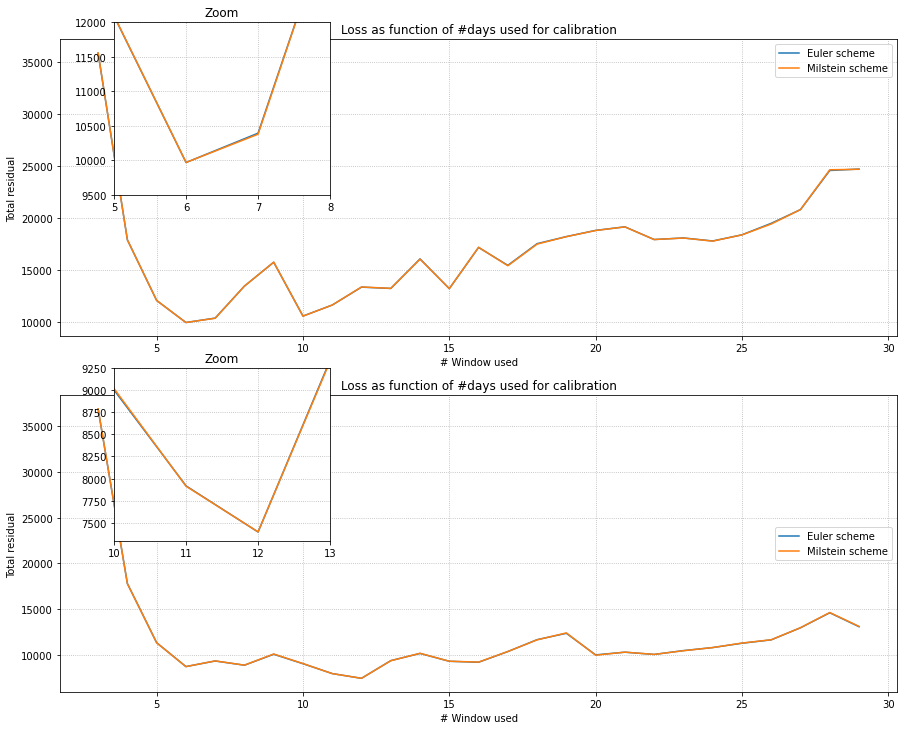

In [69]:
fig, ax = plt.subplots( nrows = 2, figsize=( 15, 12 ) )

ax[0].plot( np.arange( min, max ), sum( ( vol1_mean_e[ :, i ] - UX1.PX_LAST.values[ i ] )**2 for i in range( max, UX1.index.size ) ), label = 'Euler scheme' )
ax[0].plot( np.arange( min, max ), sum( ( vol1_mean_m[ :, i ] - UX1.PX_LAST.values[ i ] )**2 for i in range( max, UX1.index.size ) ), label = 'Milstein scheme' )
ax[0].set_xlabel('# Window used')
ax[0].set_ylabel('Total residual')
ax[0].set_title( 'Loss as function of #days used for calibration' )
ax[0].grid(linestyle='dotted')
ax[0].legend(loc = 'upper right')

# An inner plot to zoom
axes1 = plt.axes( [0.175, 0.70, 0.2, 0.2] )
axes1.set_title( 'Zoom' )
axes1.plot( np.arange( 0 + min, 16 + min ), sum( ( vol1_mean_e[ :, i ] - UX1.PX_LAST.values[ i ] )**2 for i in range( max, UX1.index.size ) )[0:16] )
axes1.plot( np.arange( 0 + min, 16 + min ), sum( ( vol1_mean_m[ :, i ] - UX1.PX_LAST.values[ i ] )**2 for i in range( max, UX1.index.size ) )[0:16] )
axes1.grid( linestyle = 'dotted' )
axes1.set_ylim( [9500,12000] )
axes1.set_xlim( [5,8] )
axes1.xaxis.set_major_locator(MultipleLocator(1))


ax[1].plot( np.arange( min, max ), sum( ( vol2_mean_e[ :, i ] - UX2.PX_LAST.values[ i ] )**2 for i in range( max, UX2.index.size ) ), label = 'Euler scheme' )
ax[1].plot( np.arange( min, max ), sum( ( vol2_mean_m[ :, i ] - UX2.PX_LAST.values[ i ] )**2 for i in range( max, UX2.index.size ) ), label = 'Milstein scheme' )
ax[1].set_xlabel('# Window used')
ax[1].set_ylabel('Total residual')
ax[1].set_title( 'Loss as function of #days used for calibration' )
ax[1].grid(linestyle='dotted')
ax[1].legend(loc = 'center right')

# An inner plot to zoom
axes2 = plt.axes( [ 0.175, 0.30, 0.2, 0.2 ] )
axes2.set_title( 'Zoom' )
axes2.plot( np.arange( 5 + min, 16 + min ), sum( ( vol2_mean_e[ :, i ] - UX2.PX_LAST.values[ i ] )**2 for i in range( max, UX2.index.size ) )[5:16] )
axes2.plot( np.arange( 5 + min, 16 + min ), sum( ( vol2_mean_m[ :, i ] - UX2.PX_LAST.values[ i ] )**2 for i in range( max, UX2.index.size ) )[5:16] )
axes2.grid( linestyle = 'dotted' )
axes2.set_ylim( [7300,9250] )
axes2.set_xlim( [10,13] )
axes2.xaxis.set_major_locator(MultipleLocator(1))


plt.show()

In [70]:
index_min_1e = np.argmin( sum( ( vol1_mean_e[ :, i ] - UX1.PX_LAST.values[ i ] )**2 for i in range( max, UX1.index.size ) ) )
index_min_2e = np.argmin( sum( ( vol2_mean_e[ :, i ] - UX2.PX_LAST.values[ i ] )**2 for i in range( max, UX2.index.size ) ) )
index_min_1m = np.argmin( sum( ( vol1_mean_m[ :, i ] - UX1.PX_LAST.values[ i ] )**2 for i in range( max, UX1.index.size ) ) )
index_min_2m = np.argmin( sum( ( vol2_mean_m[ :, i ] - UX2.PX_LAST.values[ i ] )**2 for i in range( max, UX2.index.size ) ) )

print( 'Window used that gives minimum distance with Euler scheme for UX1:\t\t',    index_min_1e + min)
print( 'Window used that gives minimum distance with Euler scheme for UX2:\t\t',    index_min_2e + min)
print( 'Window used that gives minimum distance with Milstein scheme for UX1:\t\t', index_min_1m + min)
print( 'Window used that gives minimum distance with Milstein scheme for UX2:\t\t', index_min_2m + min)
print( '\n\n' )

loss_1e = sum( ( vol1_mean_e[ index_min_1e, i ] - UX1.PX_LAST.values[ i ] )**2 for i in range( max, UX1.index.size ) )
loss_1m = sum( ( vol1_mean_m[ index_min_1m, i ] - UX1.PX_LAST.values[ i ] )**2 for i in range( max, UX1.index.size ) )
loss_2e = sum( ( vol2_mean_e[ index_min_2e, i ] - UX2.PX_LAST.values[ i ] )**2 for i in range( max, UX2.index.size ) )
loss_2m = sum( ( vol2_mean_m[ index_min_2m, i ] - UX2.PX_LAST.values[ i ] )**2 for i in range( max, UX2.index.size ) )

print( 'Minimum loss for Euler scheme, UX1:\t\t',    "{:.2f}".format( loss_1e ) )
print( 'Minimum loss for Euler scheme, UX2:\t\t',    "{:.2f}".format( loss_2e ) )
print( 'Minimum loss for Milstein scheme, UX1:\t\t', "{:.2f}".format( loss_1m ) )
print( 'Minimum loss for Milstein scheme, UX2:\t\t', "{:.2f}".format( loss_2m ) )


UX1[       'mean_sim_e'  ] = vol1_mean_e[   index_min_1e, : ]
UX2[       'mean_sim_e'  ] = vol2_mean_e[   index_min_2e, : ]
SPX_price[ 'mean_sim1_e' ] = price1_mean_e[ index_min_1e, : ]
SPX_price[ 'mean_sim2_e' ] = price2_mean_e[ index_min_2e, : ]


UX1[       'mean_sim_m'  ] = vol1_mean_m[   index_min_1m, : ]
UX2[       'mean_sim_m'  ] = vol2_mean_m[   index_min_2m, : ]
SPX_price[ 'mean_sim1_m' ] = price1_mean_m[ index_min_1m, : ]
SPX_price[ 'mean_sim2_m' ] = price2_mean_m[ index_min_2m, : ]


UX1[           'stoc_m'  ] = volat1_m[   index_min_1m, :, 0 ]
UX2[           'stoc_m'  ] = volat2_m[   index_min_2m, :, 0 ]

Window used that gives minimum distance with Euler scheme for UX1:		 6
Window used that gives minimum distance with Euler scheme for UX2:		 12
Window used that gives minimum distance with Milstein scheme for UX1:		 6
Window used that gives minimum distance with Milstein scheme for UX2:		 12



Minimum loss for Euler scheme, UX1:		 9970.06
Minimum loss for Euler scheme, UX2:		 7396.89
Minimum loss for Milstein scheme, UX1:		 9970.44
Minimum loss for Milstein scheme, UX2:		 7398.60


We see that for our task there is no evident difference between the two methods. Milstein scheme is an overkill, because for each point we are just computing the next one with a certain level of stochasticity, the difference is not appreciable.

In [71]:
n = index_min_1m

k             = np.zeros( shape = ( UX1.index.size - n ) )
sigma         = np.zeros( shape = ( UX1.index.size - n ) )
theta         = np.zeros( shape = ( UX1.index.size - n ) )

for i in range(n,UX1.index.size):
    Vt1    = UX1.PX_LAST.values[i-n:i]**2

    b1     = np.abs(  ( ( 1 / n**2 * sum( Vt1[i  ] for i in range( 1, n ) ) * sum( Vt1[ i - 1 ]**( -1 )  for i in range( 1, n ) ) )   -
                        ( 1 / n    * sum( Vt1[i  ]                          *      Vt1[ i - 1 ]**( -1 )  for i in range( 1, n ) ) ) ) /
                        ( 1 / n**2 * sum( Vt1[i-1] for i in range( 1, n ) ) * sum( Vt1[ i - 1 ]**( -1 )  for i in range( 1, n ) ) - 1 ) )

    b2     = np.abs( (   1 / n    * sum( Vt1[i  ]                           *      Vt1[ i - 1 ]**( -1 )  for i in range( 1, n ) )       - b1 ) /
                     (              sum(                                           Vt1[ i - 1 ]**( -1 )  for i in range( 1, n ) ) * ( 1 - b1 ) / n ) )

    b3     = np.abs(     1 / n    * sum( ( Vt1[i] - Vt1[i-1] * b1 - b2 * ( 1 - b1 )**2 ) / Vt1[ i - 1 ] for i in range( 1, n ) ) )

    k[i-n]     = - np.log( b1 ) / delta
    theta[i-n] = b2
    sigma[i-n] = np.sqrt( 2 * k1 * b3 / ( 1 - b1**2 ) )


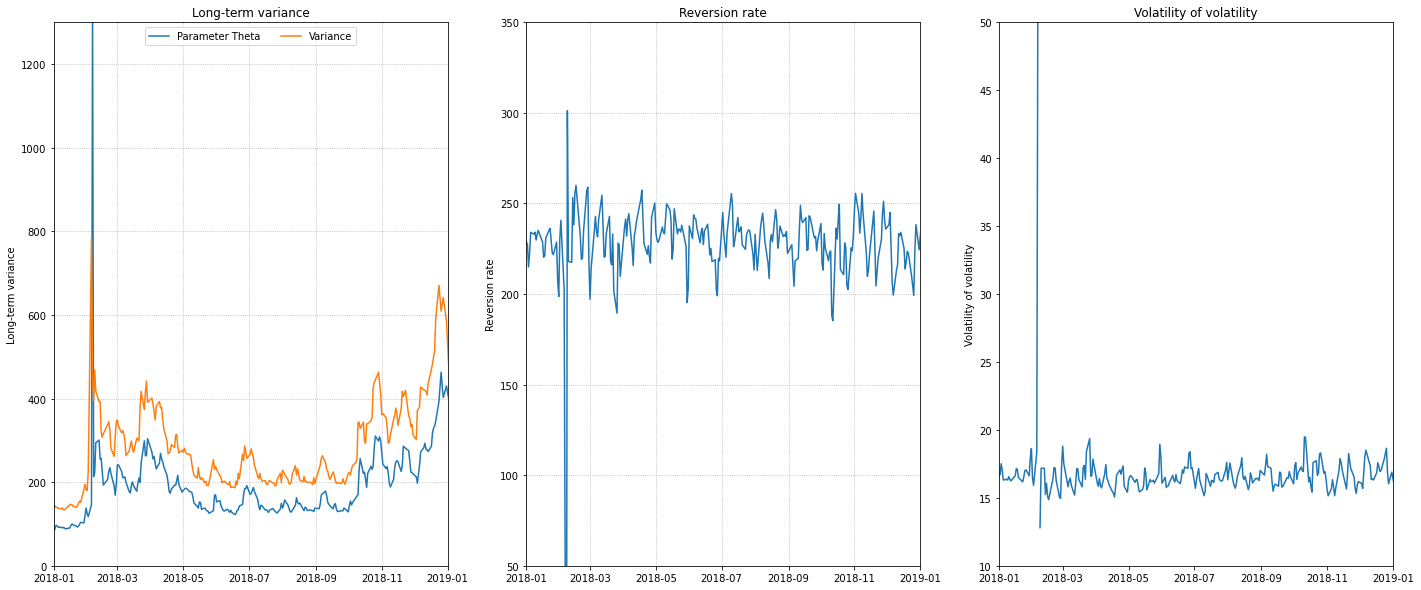

In [72]:
fig, ax = plt.subplots( ncols=3, figsize=( 24, 10 ), sharex=True )

ax[0].plot( UX1.index.values[n:], theta, label = 'Parameter Theta' )
ax[0].plot( UX1.index.values[n:], UX1.PX_LAST.values[n:]**2, label = 'Variance' )
ax[0].set_title('Long-term variance')
ax[0].set_ylabel('Long-term variance')
ax[0].legend(loc='upper center', ncol=2)

ax[0].set_xlim([date(2018, 1, 1), date(2019, 1, 1)])
ax[0].set_ylim(bottom = 0, top = 1300)
ax[0].grid(ls = 'dotted')


ax[1].plot( UX1.index.values[n:], k )
ax[1].set_title('Reversion rate')
ax[1].set_ylabel('Reversion rate')
ax[1].set_ylim(bottom = 50,top = 350)

ax[1].grid(ls = 'dotted')

ax[2].plot( UX1.index.values[n:], sigma )
ax[2].set_title('Volatility of volatility')
ax[2].set_ylabel('Volatility of volatility')
ax[2].set_ylim(top = 50, bottom=10 )

ax[0].grid(ls = 'dotted')

plt.show()

We see now the predicted values for prices and volatility.
We immediately see how the prices are very noisy, this is probably due to the non optimal estimation of the parameters.

On the other hand we see that, even if the volatilities are not apparently that much noisy, giving a look at the residuals one can see that the estimation is not always optimal.

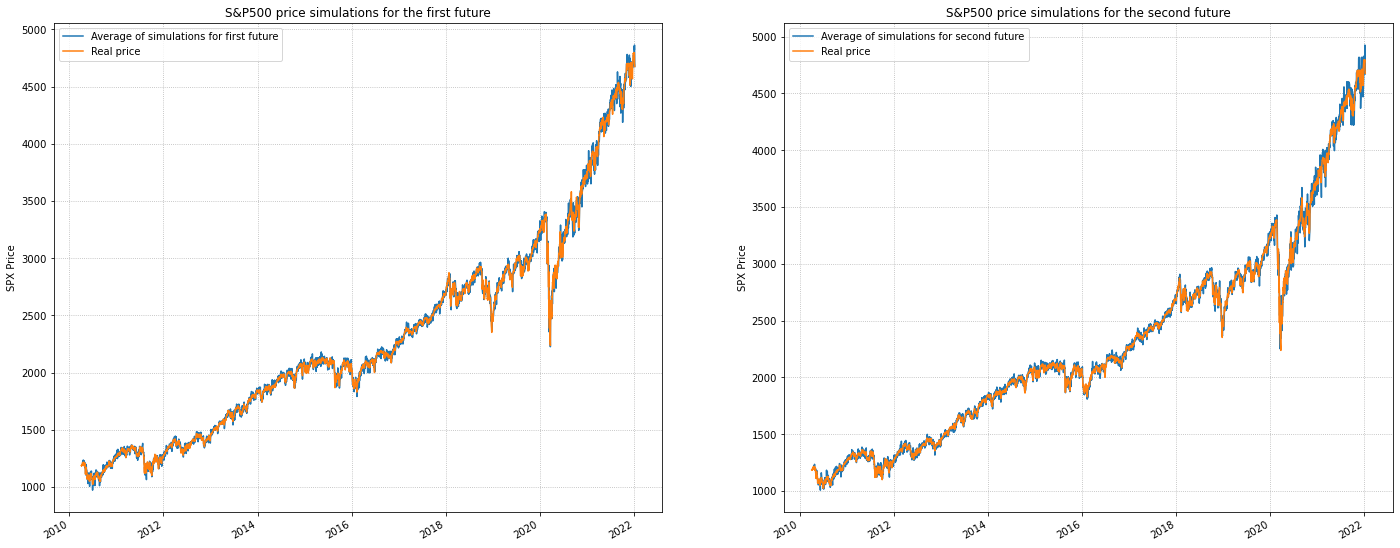

In [73]:
fig, ax = plt.subplots( ncols=2, figsize=( 24, 10 ) )

ax[0].plot( SPX_price.index, SPX_price['mean_sim1_m'], label='Average of simulations for first future' )
ax[0].plot( SPX_price.index, SPX_price.Close,      label='Real price')
ax[0].grid( linestyle='dotted' )
ax[0].legend(loc='upper left')
ax[0].set_title ( 'S&P500 price simulations for the first future' )
ax[0].set_ylabel( 'SPX Price' )

ax[1].plot( SPX_price.index, SPX_price['mean_sim2_m'], label='Average of simulations for second future' )
ax[1].plot( SPX_price.index, SPX_price.Close,      label='Real price')
ax[1].grid( linestyle='dotted' )
ax[1].legend(loc='upper left')
ax[1].set_title ( 'S&P500 price simulations for the second future' )
ax[1].set_ylabel( 'SPX Price' )

fig.autofmt_xdate( )
plt.show()

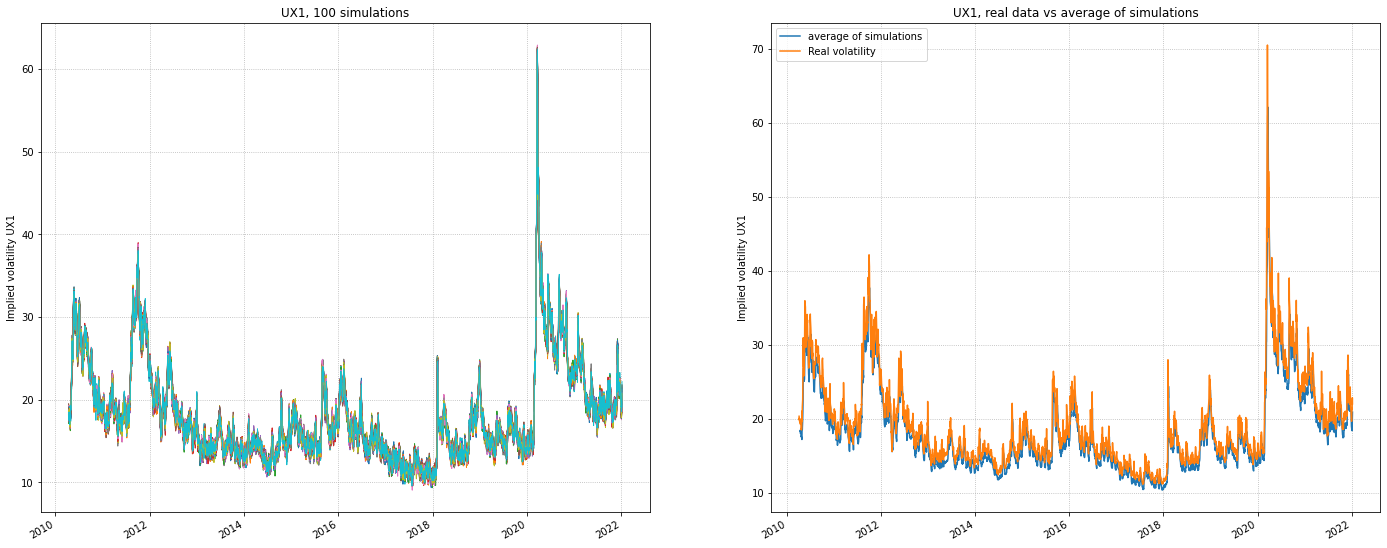

In [74]:
fig, ax = plt.subplots( ncols=2, figsize=( 24, 10 ) )

#ax[0].plot(UX1.index, UX1.PX_LAST, lw=2, label='Real volatility')
for k in range( Npaths ):
    ax[0].plot( UX1.index, volat1_m[ index_min_1m, :, k ], label='', lw=1 )
ax[0].grid( linestyle='dotted' )
#ax[0].legend(loc='upper left')
ax[0].set_title ( 'UX1, ' + str( Npaths ) + ' simulations' )
ax[0].set_ylabel( 'Implied volatility UX1' )

ax[1].plot( UX1.index, UX1['mean_sim_m'], label='average of simulations' )
ax[1].plot( UX1.index, UX1.PX_LAST, label='Real volatility')
ax[1].grid( linestyle='dotted')
ax[1].legend( loc='upper left')
ax[1].set_title ( 'UX1, real data vs average of simulations')
ax[1].set_ylabel( 'Implied volatility UX1')

fig.autofmt_xdate( )
plt.show()

UX1['mean_sim_m'].to_csv('UX1_Heston_Predictions.csv')

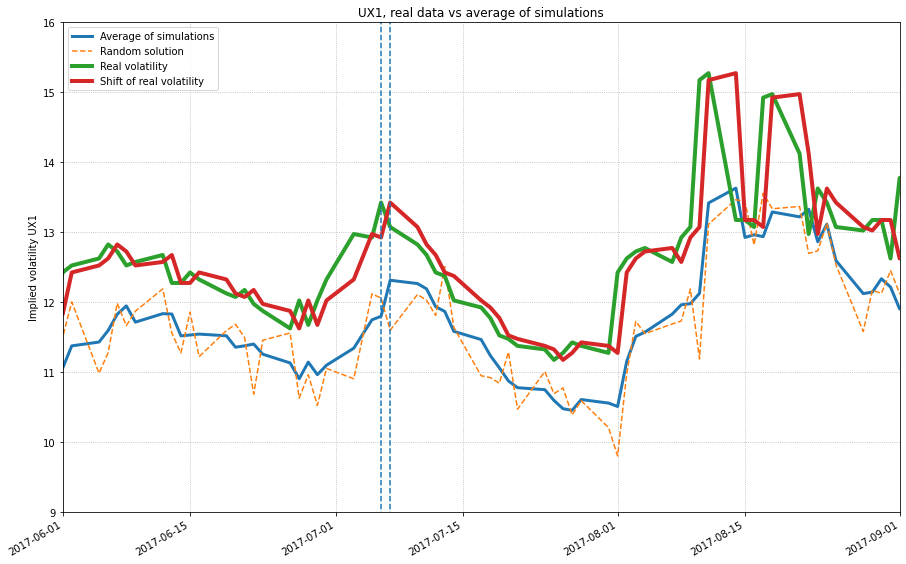

In [75]:
fig, ax = plt.subplots(figsize=( 15, 10 ) )

ax.plot( UX1.index, UX1['mean_sim_m'], label='Average of simulations', lw = 3 )
ax.plot( UX1.index, UX1['stoc_m'], label='Random solution', ls = 'dashed' )
ax.plot( UX1.index, UX1.PX_LAST, label='Real volatility', lw = 4)
ax.plot( UX1.index, UX1.PX_LAST.shift(1), label='Shift of real volatility', lw = 4)
ax.grid( linestyle='dotted')
ax.legend( loc='upper left')
ax.vlines( date(2017, 7, 6), ymin=0, ymax=20, ls='dashed' )
ax.vlines( date(2017, 7, 7), ymin=0, ymax=20, ls='dashed'  )
ax.set_title ( 'UX1, real data vs average of simulations')
ax.set_ylabel( 'Implied volatility UX1')

ax.set_xlim([date(2017, 6, 1), date(2017, 9, 1)])
ax.set_ylim([9,16])


fig.autofmt_xdate( )
plt.show()

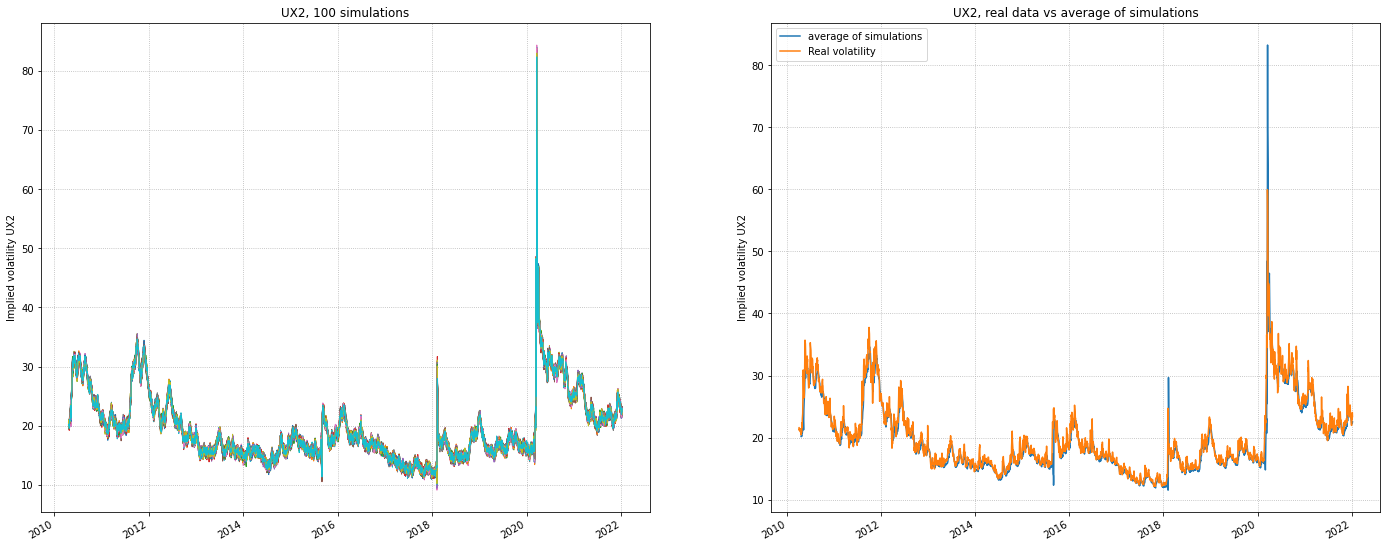

In [76]:
fig, ax = plt.subplots(ncols=2, figsize=(24,10))

for k in range(Npaths):
    ax[0].plot( UX2.index, volat2_m[ index_min_2m, :, k ], label='', lw=1 )
#ax[0].plot(UX2.index, UX2.PX_LAST, lw=5, label='Real volatility')
ax[0].grid(linestyle='dotted')
#ax[0].legend(loc='best')
ax[0].set_title('UX2, ' + str(Npaths) + ' simulations')
ax[0].set_ylabel('Implied volatility UX2')

ax[1].plot(UX2.index, UX2['mean_sim_m'], label='average of simulations')
ax[1].plot(UX2.index, UX2.PX_LAST, label='Real volatility')
ax[1].grid(linestyle='dotted')
ax[1].legend(loc='best')
ax[1].set_title('UX2, real data vs average of simulations')
ax[1].set_ylabel('Implied volatility UX2')

fig.autofmt_xdate()
plt.show()

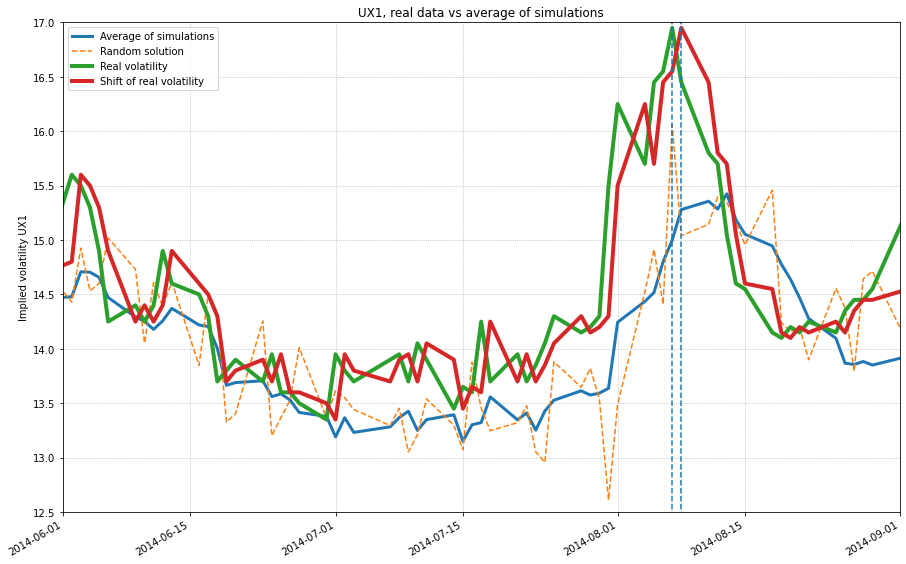

In [77]:
fig, ax = plt.subplots(figsize=( 15, 10 ) )

ax.plot( UX2.index, UX2['mean_sim_m'], label='Average of simulations', lw = 3 )
ax.plot( UX2.index, UX2['stoc_m'], label='Random solution', linestyle = 'dashed' )
ax.plot( UX2.index, UX2.PX_LAST, label='Real volatility', lw = 4)
ax.plot( UX2.index, UX2.PX_LAST.shift(1), label='Shift of real volatility', lw = 4)

ax.vlines( date(2014, 8, 7), ymin=0, ymax=20, ls='dashed' )
ax.vlines( date(2014, 8, 8), ymin=0, ymax=20, ls='dashed'  )

ax.grid( linestyle='dotted')
ax.legend( loc='upper left')
ax.set_title ( 'UX1, real data vs average of simulations')
ax.set_ylabel( 'Implied volatility UX1')

ax.set_xlim([date(2014, 6, 1), date(2014, 9, 1)])
ax.set_ylim([12.5,17])


fig.autofmt_xdate( )
plt.show()

We give a look to the residuals between the expected values in $t+1$ and the real ones, we expect a gaussian behaviour centered in $0$.

In [78]:
UX1[ 'resid' ] = UX1['mean_sim_m'] - UX1['PX_LAST']
UX2[ 'resid' ] = UX2['mean_sim_m'] - UX2['PX_LAST']

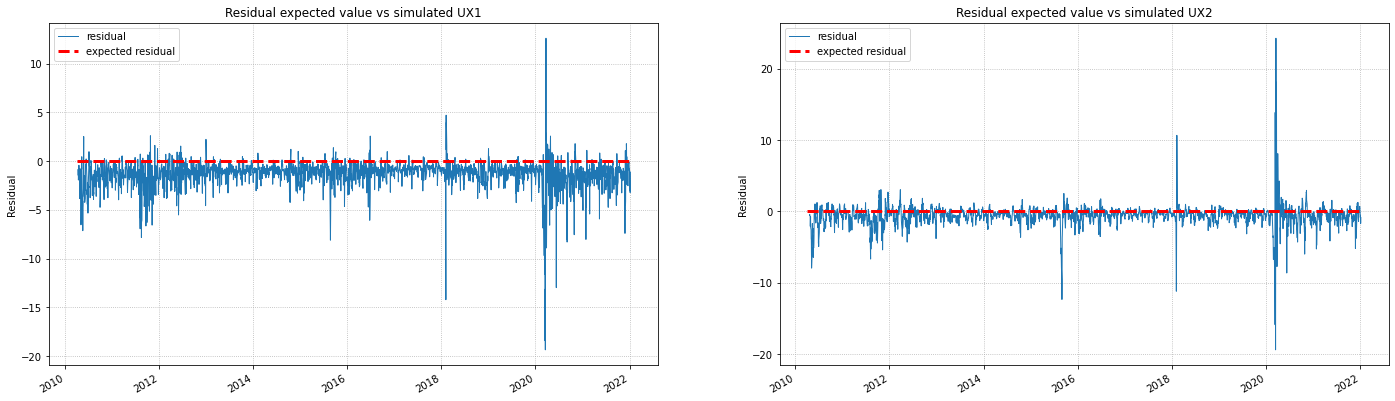

In [79]:
fig, ax = plt.subplots(ncols=2, figsize=(24,7))

ax[0].plot(UX1.index, UX1.resid, lw=1, label='residual')
ax[0].hlines(0, UX1.index.min(), UX1.index.max(), lw=3, color='red', linestyle='dashed', label='expected residual')
ax[0].grid(linestyle='dotted')
ax[0].legend(loc='best')
ax[0].set_title('Residual expected value vs simulated UX1')
ax[0].set_ylabel('Residual')

ax[1].plot(UX2.index, UX2.resid, lw=1, label='residual')
ax[1].hlines(0, UX2.index.min(), UX2.index.max(), lw=3, color='red', linestyle='dashed', label='expected residual')
ax[1].grid(linestyle='dotted')
ax[1].legend(loc='best')
ax[1].set_title('Residual expected value vs simulated UX2')
ax[1].set_ylabel('Residual')

fig.autofmt_xdate()
plt.show()

N  			=		 240.61628045476658 		+/-		 4.240415688731638
mu 			=		 -0.9621835175000198 		+/-		 0.012576207514057768
std			=		 0.6179923109380179 		+/-		 0.012576207382752367


R2 			=		 0.9528929795659218 
R 			=		 0.9761623735659564

Covariance matrix:
 [[1.         0.07020391]
 [0.07020391 1.        ]]

n degrees of freedom 	=		 82

chi2 			=		 453.662025130365
p-value 		=		 0.0


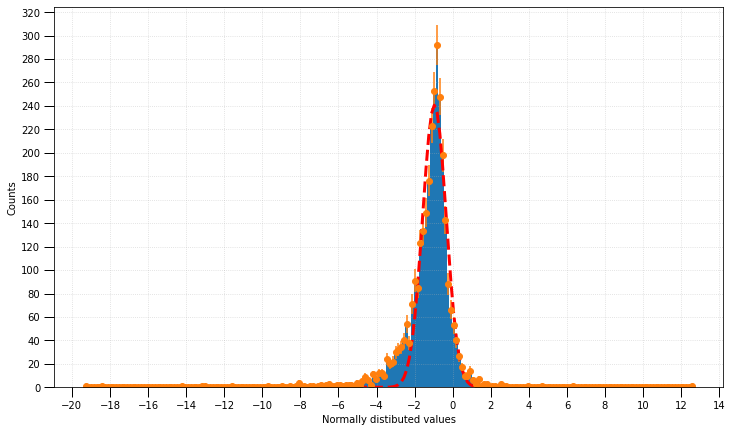

In [80]:
b                 = np.histogram_bin_edges(UX1.resid.dropna(), bins='fd')
fig, ax           = plt.subplots(figsize=(12, 7))
entries, edges, _ = ax.hist(UX1.resid, bins=b)
ax.set_ylabel('Counts')
ax.set_xlabel("Normally distibuted values")
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_major_locator(MultipleLocator( 2))
ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.grid(linestyle='dotted', alpha=0.5)

# calculate bin centers
bin_centers = 0.5 * (edges[:-1] + edges[1:])

# draw errobars, use the sqrt error. You can use what you want there
# poissonian 1 sigma intervals would make more sense
ax.errorbar(bin_centers, entries, yerr=np.sqrt(entries), fmt='o')

def gaussian(x, N, mu, sig):
    return N * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

popt, pcov = optimize.curve_fit(gaussian, bin_centers, entries, p0 = [100,0, 1])
ax.plot(bin_centers, gaussian(bin_centers, popt[0],popt[1],popt[2]), linestyle='dashed',c = 'r', lw=3 )

ssr = np.sum((entries - gaussian(bin_centers, popt[0],popt[1],popt[2]))**2)
tss = np.sum((np.mean(entries) - entries)**2)

rsq = 1 - ssr / tss
sigma_y  = np.sqrt(np.abs(entries))
mask_err = (sigma_y!=0)
offsetUX1 = popt[1]
UX1.mean_sim_m -= offsetUX1

print("N  \t\t\t=\t\t", popt[0], "\t\t+/-\t\t", pcov[0,0]**.5)
print("mu \t\t\t=\t\t", popt[1], "\t\t+/-\t\t", pcov[1,1]**.5)
print("std\t\t\t=\t\t", popt[2], "\t\t+/-\t\t", pcov[2,2]**.5)

print("\n")
print("R2 \t\t\t=\t\t", rsq, "\nR \t\t\t=\t\t", np.sqrt(rsq))
print("\nCovariance matrix:\n", np.corrcoef(bin_centers,entries)) # check with the correlation matrix that R is the correlation coefficient

ndof = len(bin_centers[mask_err]) - 3
print("\nn degrees of freedom \t=\t\t", ndof)
# calculate the chi^2
chi2 = np.sum(((entries[mask_err] - (gaussian(bin_centers[mask_err], popt[0],popt[1],popt[2])))**2) / sigma_y[mask_err]**2)
print("\nchi2 \t\t\t=\t\t", chi2)
# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value \t\t=\t\t", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory

N  			=		 225.29416816752598 		+/-		 2.369863015571822
mu 			=		 -0.40851958877480377 		+/-		 0.007797801337236014
std			=		 0.6419801645133866 		+/-		 0.007797801233116348


R2 			=		 0.9756825587535507 
R 			=		 0.9877664494978308

Covariance matrix:
 [[ 1.         -0.06234497]
 [-0.06234497  1.        ]]

n degrees of freedom 	=		 92

chi2 			=		 326.88135539360684
p-value 		=		 0.0


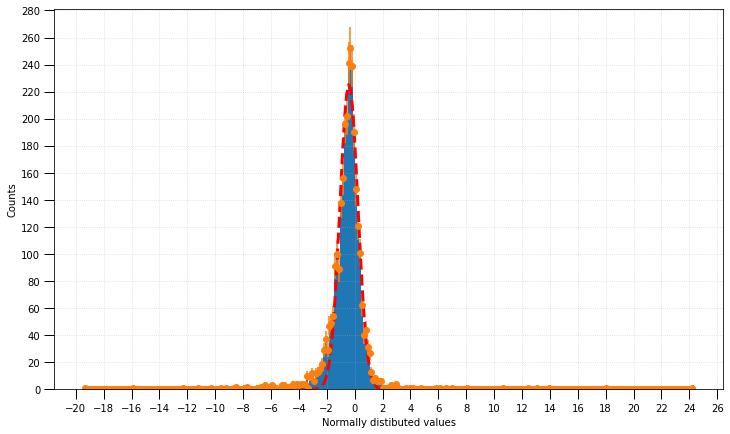

In [81]:
b                 = np.histogram_bin_edges(UX2.resid.dropna(), bins='fd')
fig, ax           = plt.subplots(figsize=(12, 7))
entries, edges, _ = ax.hist(UX2.resid, bins=b)
ax.set_ylabel('Counts')
ax.set_xlabel("Normally distibuted values")
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_major_locator(MultipleLocator( 2))
ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.grid(linestyle='dotted', alpha=0.5)

# calculate bin centers
bin_centers = 0.5 * (edges[:-1] + edges[1:])

# draw errobars, use the sqrt error. You can use what you want there
# poissonian 1 sigma intervals would make more sense
ax.errorbar(bin_centers, entries, yerr=np.sqrt(entries), fmt='o')

def gaussian(x, N, mu, sig):
    return N * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

popt, pcov = optimize.curve_fit(gaussian, bin_centers, entries, p0 = [100,0, 1])
ax.plot(bin_centers, gaussian(bin_centers, popt[0],popt[1],popt[2]), linestyle='dashed',c = 'r', lw=3 )

ssr = np.sum((entries - gaussian(bin_centers, popt[0],popt[1],popt[2]))**2)
tss = np.sum((np.mean(entries) - entries)**2)

rsq = 1 - ssr / tss
sigma_y  = np.sqrt(np.abs(entries))
mask_err = (sigma_y!=0)
offsetUX2 = popt[1]
UX2.mean_sim_m -= offsetUX2

print("N  \t\t\t=\t\t", popt[0], "\t\t+/-\t\t", pcov[0,0]**.5)
print("mu \t\t\t=\t\t", popt[1], "\t\t+/-\t\t", pcov[1,1]**.5)
print("std\t\t\t=\t\t", popt[2], "\t\t+/-\t\t", pcov[2,2]**.5)

print("\n")
print("R2 \t\t\t=\t\t", rsq, "\nR \t\t\t=\t\t", np.sqrt(rsq))
print("\nCovariance matrix:\n", np.corrcoef(bin_centers,entries)) # check with the correlation matrix that R is the correlation coefficient

ndof = len(bin_centers[mask_err]) - 3
print("\nn degrees of freedom \t=\t\t", ndof)
# calculate the chi^2
chi2 = np.sum(((entries[mask_err] - (gaussian(bin_centers[mask_err], popt[0],popt[1],popt[2])))**2) / sigma_y[mask_err]**2)
print("\nchi2 \t\t\t=\t\t", chi2)
# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value \t\t=\t\t", pvalue) # if the p-value is < 0.05, the fit is considered unsatisfactory

We see a systematic underestimation for the volatility: we decide to use it as a general offset of the expected volatilities.

We try also to, find the intradays values of volatility. For simplicity we divide each open-market day in 12 parts, considering 9 hours of markets open (in reality markets are open around $6-8.5$ hours).

In [82]:
steps       = 12
delta       = 1 / 252 / steps
volat1      = np.zeros( shape = ( max - min,       UX1.index.size * steps, Npaths ) )
volat2      = np.zeros( shape = ( max - min,       UX2.index.size * steps, Npaths ) )

vol1_mean   = np.zeros( shape = ( max - min,       UX1.index.size * steps         ) )
vol2_mean   = np.zeros( shape = ( max - min,       UX2.index.size * steps         ) )

for n in window:
    print( '... processing window', n, '...' )

    prices1 = np.empty( ( ( SPX_price.index.size - n ) * steps, Npaths ) )
    prices2 = np.empty( ( ( SPX_price.index.size - n ) * steps, Npaths ) )
    vol1    = np.empty( ( (       UX1.index.size - n ) * steps, Npaths ) )
    vol2    = np.empty( ( (       UX2.index.size - n ) * steps, Npaths ) )

    for i in range(n,UX1.index.size):
        Vt1    = UX1.PX_LAST.values[        i-n:i]**2
        Vt2    = UX2.PX_LAST.values[        i-n:i]**2
        S      = SPX_price.Close.values[    i-n:i]

        V10    = Vt1[-1]
        V20    = Vt2[-1]
        S0     =   S[-1]

        b1     = np.abs( ( ( 1 / n**2 * sum( Vt1[i  ] for i in range( 1, n ) ) * sum( Vt1[ i - 1 ]**( -1 )  for i in range( 1, n ) ) )   -
                           ( 1 / n    * sum( Vt1[i  ]                          *      Vt1[ i - 1 ]**( -1 )  for i in range( 1, n ) ) ) ) /
                           ( 1 / n**2 * sum( Vt1[i-1] for i in range( 1, n ) ) * sum( Vt1[ i - 1 ]**( -1 )  for i in range( 1, n ) ) - 1 ) )

        b2     = np.abs( (   1 / n    * sum( Vt1[i  ]                          *      Vt1[ i - 1 ]**( -1 )  for i in range( 1, n ) )       - b1 ) /
                         (              sum(                                          Vt1[ i - 1 ]**( -1 )  for i in range( 1, n ) ) * ( 1 - b1 ) / n ) )

        b3     = np.abs(     1 / n    * sum( ( Vt1[i] - Vt1[i-1] * b1 - b2 * ( 1 - b1 )**2 ) / Vt1[ i - 1 ] for i in range( 1, n ) ) )

        k1     = - np.log( b1 ) / delta
        theta1 = b2
        sigma1 = np.sqrt( 2 * k1 * b3 / ( 1 - b1**2 ) )


        b1     = np.abs( ( ( 1 / n**2 * sum( Vt2[i  ] for i in range( 1, n ) ) * sum( Vt2[ i - 1 ]**( -1 )  for i in range( 1, n ) ) )   -
                           ( 1 / n    * sum( Vt2[i  ]                          *      Vt2[ i - 1 ]**( -1 )  for i in range( 1, n ) ) ) ) /
                           ( 1 / n**2 * sum( Vt2[i-1] for i in range( 1, n ) ) * sum( Vt2[ i - 1 ]**( -1 )  for i in range( 1, n ) ) - 1 ) )

        b2     = np.abs( (   1 / n    * sum( Vt2[i  ]                          *      Vt2[ i - 1 ]**( -1 )  for i in range( 1, n ) )       - b1 ) /
                         (              sum(                                          Vt2[ i - 1 ]**( -1 )  for i in range( 1, n ) ) * ( 1 - b1 ) / n ) )

        b3     = np.abs(     1 / n    * sum( ( Vt2[i] - Vt2[i-1] * b1 - b2 * ( 1 - b1 )**2 ) / Vt2[ i - 1 ] for i in range( 1, n ) ) )

        k2     = - np.log( b1 ) / delta
        theta2 = b2
        sigma2 = np.sqrt( 2 * k2 * b3 / ( 1 - b1**2 ) )

        _, v1 = heston_pde_milstein( S0, r, k1, theta1, V10, rho, sigma1, steps, Npaths )
        _, v2 = heston_pde_milstein( S0, r, k2, theta2, V20, rho, sigma2, steps, Npaths )

        vol1[   i*steps-n*steps:i*steps-n*steps+steps,:] = v1[:].T
        vol2[   i*steps-n*steps:i*steps-n*steps+steps,:] = v2[:].T

    vol1                    = np.insert(    vol1, 0, np.full( ( n * steps, Npaths ), np.nan ), axis = 0 )
    vol2                    = np.insert(    vol2, 0, np.full( ( n * steps, Npaths ), np.nan ), axis = 0 )

    volat1[ n - min, :, : ] = np.sqrt( vol1 )
    volat2[ n - min, :, : ] = np.sqrt( vol2 )

    vol1_mean[   n - min, : ] = np.sqrt( vol1.mean( axis = 1 ) )
    vol2_mean[   n - min, : ] = np.sqrt( vol2.mean( axis = 1 ) )

... processing window 3 ...
... processing window 4 ...
... processing window 5 ...
... processing window 6 ...
... processing window 7 ...
... processing window 8 ...
... processing window 9 ...
... processing window 10 ...
... processing window 11 ...
... processing window 12 ...
... processing window 13 ...
... processing window 14 ...
... processing window 15 ...
... processing window 16 ...
... processing window 17 ...
... processing window 18 ...
... processing window 19 ...
... processing window 20 ...
... processing window 21 ...
... processing window 22 ...
... processing window 23 ...
... processing window 24 ...
... processing window 25 ...
... processing window 26 ...
... processing window 27 ...
... processing window 28 ...
... processing window 29 ...


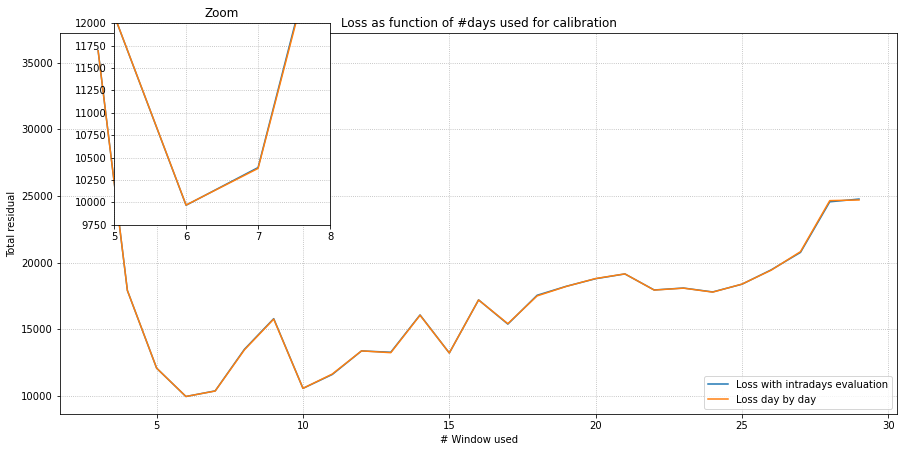

Minimum loss for day by day scheme, UX1:		 9970.44
Minimum loss for  intradays scheme, UX1:		 10577.97


In [83]:
fig, ax = plt.subplots( figsize=( 15, 7 ) )

ax.plot( np.arange( min, max ), sum( ( vol1_mean[ :, i * steps ] - UX1.PX_LAST.values[ i ] )**2 for i in range( max, UX1.index.size ) ), label='Loss with intradays evaluation' )
ax.plot( np.arange( min, max ), sum( ( vol1_mean_m[ :, i ]       - UX1.PX_LAST.values[ i ] )**2 for i in range( max, UX1.index.size ) )[0:max-min], label='Loss day by day' )
ax.set_xlabel('# Window used')
ax.set_ylabel('Total residual')
ax.grid(linestyle='dotted')
ax.set_title('Residual as function of points used')
ax.set_title( 'Loss as function of #days used for calibration' )
ax.legend(loc = 'lower right')

# An inner plot to zoom
axes = plt.axes( [ 0.175, 0.50, 0.2, 0.4 ] )
axes.set_title( 'Zoom' )
axes.plot( np.arange( 5, 9 ), sum( ( vol1_mean[ :, i * steps ] - UX1.PX_LAST.values[ i ] )**2 for i in range( max, UX1.index.size ) )[5-min:9-min] )
axes.plot( np.arange( 5, 9 ), sum( ( vol1_mean_m[ :, i ]       - UX1.PX_LAST.values[ i ] )**2 for i in range( max, UX1.index.size ) )[5-min:9-min] )

axes.grid( linestyle = 'dotted' )
axes.set_ylim( [9750,12000] )
axes.set_xlim( [5,8] )
axes.xaxis.set_major_locator(MultipleLocator(1))


plt.show()

loss_intr = sum( ( vol1_mean[ 7, i * steps ] - UX1.PX_LAST.values[ i ] )**2 for i in range( max, UX1.index.size ) )
print( 'Minimum loss for day by day scheme, UX1:\t\t', "{:.2f}".format( loss_1m  ) )
print( 'Minimum loss for  intradays scheme, UX1:\t\t', "{:.2f}".format( loss_intr ) )


The results are the same. We should use even the intradays real data.

In [84]:
index = UX1.index
new_index = []

for i in index:
    new_index.append(i)
    for j in range(11):
        minutes = 45
        hours_added = datetime.timedelta(minutes = minutes)
        future_date_and_time = i + hours_added
        new_index.append(future_date_and_time)

UX1_s = pd.DataFrame( vol1_mean[index_min_1m,:], index=new_index, columns=['Value'] )
UX1_s.Value -=  offsetUX1
UX1_s['stoc'] = volat1[index_min_1m,:,0].ravel() - offsetUX1

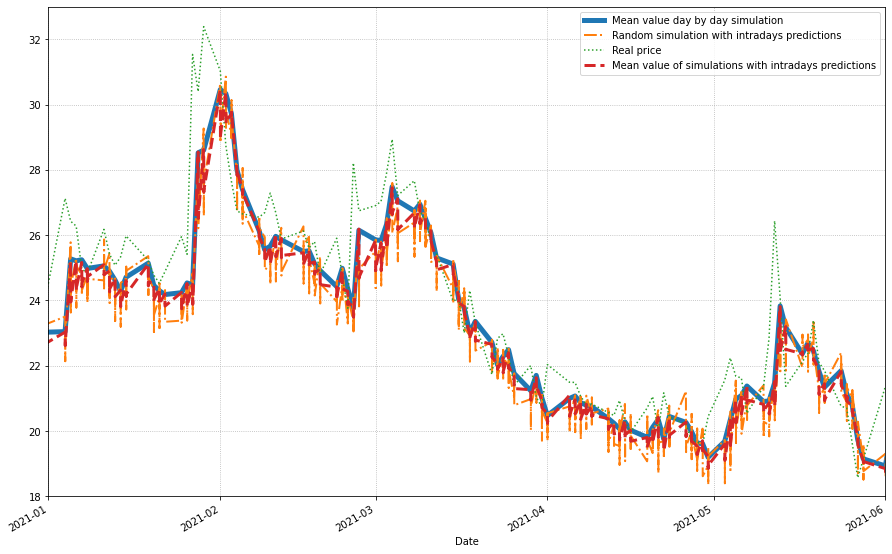

In [92]:
fig, ax = plt.subplots( figsize = ( 15, 10 ) )

UX1.mean_sim_m.plot(ax = ax, lw=5, label='Mean value day by day simulation')
UX1_s.stoc.plot(ax = ax, lw= 2, ls='dashdot', label = 'Random simulation with intradays predictions' )
UX1.PX_LAST.plot(ax = ax, ls = 'dotted', label='Real price')
UX1_s.Value.plot(ax = ax, ls = 'dashed', lw=3, label = 'Mean value of simulations with intradays predictions')

ax.set_xlim(['2021-01-01','2021-06-01'])
ax.set_ylim([18,33])
ax.grid(ls='dotted')
ax.legend()

plt.show()

In [87]:
#sns.jointplot(x='mean_sim', y='PX_LAST', data=UX1, kind='reg')
#sns.jointplot(x='mean_sim', y='PX_LAST', data=UX1, kind='resid')
#sns.jointplot(x='mean_sim', y='resid', data=UX1, kind='reg')

## Trading strategies

### First strategy
The first strategy consists in opening a short position if the predicted VIX for $t+1$ is less than today's and not closing it untill the predicted VIX for $t+1$ increases. This first strategy is has a great risk.

### Second strategy
The second strategy consists in opening a short position each time one see the predicted VIX for $t+1$ is less than today's and closing it the next day. This second strategy should be more conservative.

## First strategy

In [52]:
UX1['diff_sim'] = UX1['PX_LAST'] - UX1['mean_sim_m'].shift(-1)

conditions = [ ( UX1['diff_sim'] >  0 ),
               ( UX1['diff_sim'] <= 0 ) ]

choices = ['open','close']

UX1['open/close'] = np.select( conditions, choices, default = 0 )

conditions = [ ( UX1['open/close'] ==  'open' ) & ( UX1['open/close'].shift(1) == 'close' ),
               ( UX1['open/close'] == 'close' ) & ( UX1['open/close'].shift(1) ==  'open' ) ]

choices = ['to_open','to_close']

UX1['open/close'] = np.select( conditions, choices, default = UX1['open/close'] )

In [53]:
UX1['diff_sim_real'] =  UX1['PX_LAST'] - UX1['PX_LAST'].shift(-1)

conditions = [ ( UX1['diff_sim_real'] >  0 ),
               ( UX1['diff_sim_real'] <= 0 ) ]

choices = ['open','close']

UX1['open/close_real'] = np.select( conditions, choices, default = 0 )

conditions = [ ( ( UX1['open/close_real'] ==  'open' ) & ( ( UX1['open/close_real'].shift(1) == 'close' ) | ( UX1['open/close_real'].shift(1) == 0 ) ) ),
               ( ( UX1['open/close_real'] == 'close' ) & ( ( UX1['open/close_real'].shift(1) ==  'open' ) | ( UX1['open/close_real'].shift(1) == 0 ) ) ) ]

choices = ['to_open','to_close']

UX1['open/close_real'] = np.select( conditions, choices, default = UX1['open/close_real'] )

In [54]:
UX1['open/close_diff'] = 'correspond'
UX1['open/close_diff'].loc[ UX1['open/close'] != UX1['open/close_real'] ] = 'not correspond'

print( 'Total values processed:\t\t\t\t\t', len(UX1))
print( 'Values predicted that correspond to the real ones:\t', len(UX1[UX1['open/close'] == UX1['open/close_real'].shift(-1)]))

Total values processed:					 2964
Values predicted that correspond to the real ones:	 874


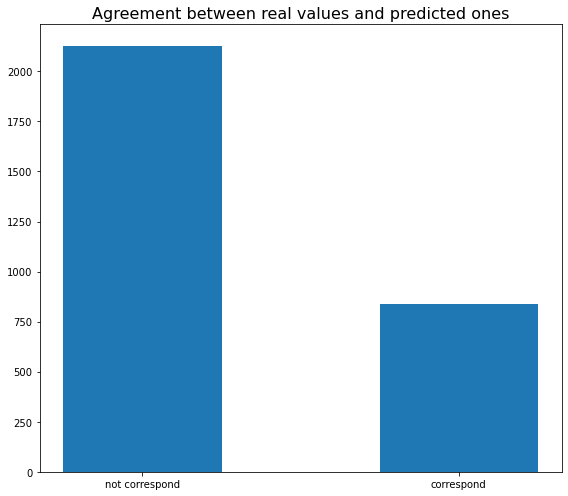

In [55]:
fig, ax = plt.subplots(figsize = ( 8, 7 ))

y = UX1['open/close_diff'].value_counts()
labels = ['not correspond', 'correspond']
xticks = [1,2] 

ax.bar(xticks,y, width = 0.5, align="center")
ax.set_title('Agreement between real values and predicted ones', fontsize = 16)
ax.set_xticks(xticks)
ax.set_xticklabels(labels) 

fig.tight_layout()

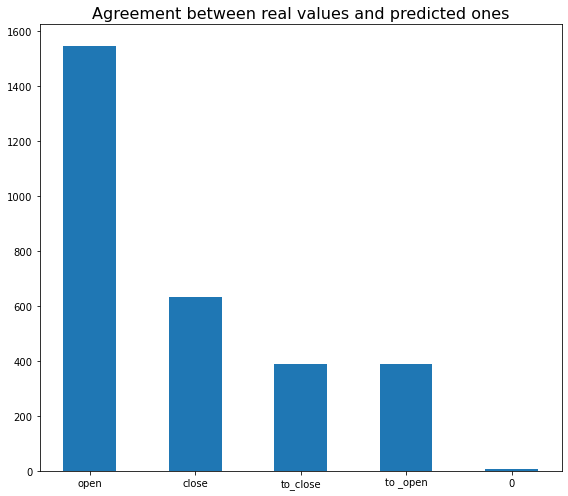

In [56]:
fig, ax = plt.subplots(figsize = ( 8, 7 ))

y = UX1['open/close'].value_counts()
labels = ['open', 'close', 'to_close', 'to _open', '0']
xticks = [1,2, 3, 4, 5] 

ax.bar(xticks,y, width = 0.5, align="center")
ax.set_title('Agreement between real values and predicted ones', fontsize = 16)
ax.set_xticks(xticks)
ax.set_xticklabels(labels) 

fig.tight_layout()

In [57]:
money = np.zeros( shape = ( len( UX1['PX_LAST'] ) ) )
money[0] = 1000
i = 0
for x in range( 1, len( UX1['PX_LAST'] ) ):
    if UX1['open/close'].iloc[x] == 'to_open':
        money[x] = money[x-1]
        i += 1
    elif UX1['open/close'].iloc[x] == 'open':
        money[x] = money[x-1]
        i += 1
    elif UX1['open/close'].iloc[x] == 'to_close':
        money[x] = money[x-1] + 100 * ( ( UX1['PX_LAST'].iloc[x-i] - UX1['PX_LAST'].iloc[x] ) / UX1['PX_LAST'].iloc[x-i] )
        i = 0
    else:
        money[x] = money[x-1]

In [58]:
money_real = np.zeros(shape=(len(UX1['PX_LAST'])))
money_real[0] = 1000
i = 0
for x in range( 1, len( UX1['PX_LAST'] ) ):
    if UX1['open/close_real'].iloc[x] == 'to_open':
        money_real[x] = money_real[x-1]
        i += 1
    elif UX1['open/close_real'].iloc[x] == 'open':
        money_real[x] = money_real[x-1]
        i += 1
    elif UX1['open/close_real'].iloc[x] == 'to_close':
        money_real[x] = money_real[x-1] + 100 * ( ( UX1['PX_LAST'].iloc[x-i] - UX1['PX_LAST'].iloc[x] ) / UX1['PX_LAST'].iloc[x-i] )
        i = 0
    else:
        money_real[x] = money_real[x-1]

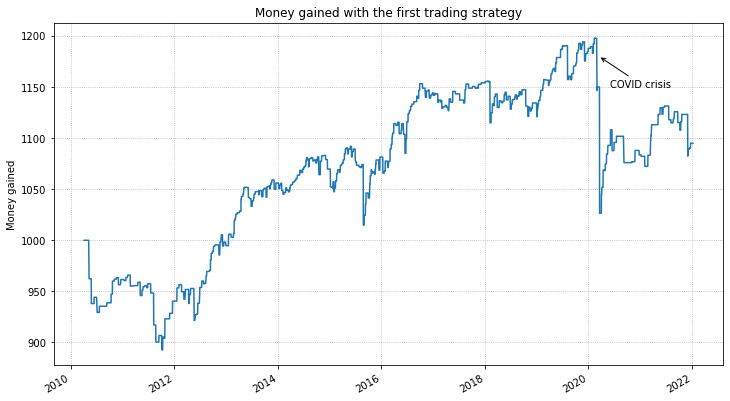

In [59]:
UX1['Money_STR1a'] = money

fig, ax = plt.subplots( figsize = ( 12, 7 ) )

UX1.Money_STR1a.plot( ax = ax )
ax.set_title( 'Money gained with the first trading strategy' )
ax.set_xlabel( '' )
ax.set_ylabel( 'Money gained' )
ax.grid( linestyle = 'dotted' )

ax.annotate( "COVID crisis", xy = ( '2020-03-15', 1180 ), xytext = ( '2020-06-01', 1150 ),
             arrowprops = dict( arrowstyle = "->" ) )

plt.show()

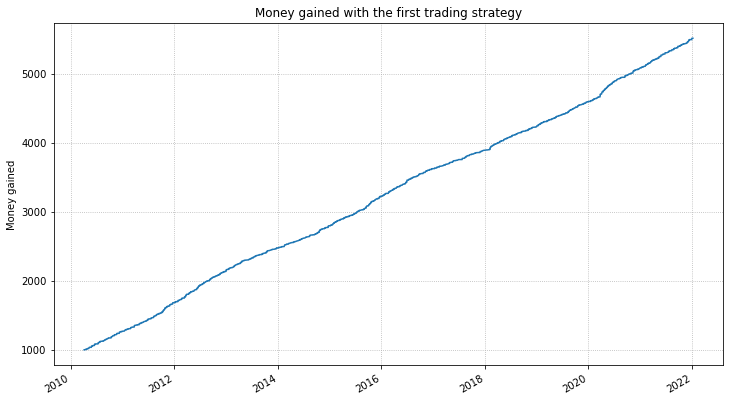

In [60]:
UX1['Money_Real_STR1a'] = money_real

fig, ax = plt.subplots( figsize = ( 12, 7 ) )

UX1.Money_Real_STR1a.plot( ax = ax )
ax.set_title( 'Money gained with the first trading strategy' )
ax.set_xlabel( '' )
ax.set_ylabel( 'Money gained' )
ax.grid( linestyle = 'dotted' )

#ax.annotate( "COVID crisis", xy = ( '2020-03-15', 975 ), xytext = ( '2020-06-01', 1050 ),
#             arrowprops = dict( arrowstyle = "->" ) )

plt.show()

## Use of a coefficient to choose how much to be invested

Instead of investing the same value based only on the prediction

$$
    VIX[t] - VIX[t+1] < 0
$$

we decide to use a coefficient which will be multiplied to the constant arbitrary value. The coefficient should mesure the confidence we have in our bet: we chose the value

$$
    \gamma = VIX_{real}[t] - VIX_{pred}[t+1]
$$

In this way the bet gain will be

$$
    m[i+1] = m[i] + 100\gamma\frac{VIX_{real}[t]-VIX_{real}[t+1]}{VIX_{real}[t]}
$$

Beside this we decide to change even the constant part: we can chose to divide money into severe brackets given by numbers between two powers of 10, i.e. if we have 2000 we are in the 1000 bracket. Anyway to have something more efficient and less arbitrary we decide to mix up the factors as follows

$$
    m[i+1] = m[i] + \frac{m[i]}{15}\cdot \tanh\gamma \cdot \frac{VIX_{real}[t]-VIX_{real}[t+1]}{VIX_{real}[t]}
$$

In this way we can potentially deal with both short and long position.

In [61]:
money    = np.zeros( shape = ( len( UX1['PX_LAST'] ) ) )
money[0] = 1000
inv_eff  = np.array([])

i = 0
investment = []
for x in range( 1, len( UX1['PX_LAST'] ) ):
    if UX1['PX_LAST'].iloc[x] > 20:
        d = 10
    else:
        d = 30
    if UX1['open/close'].iloc[x] == 'to_open': # open the position, put a fraction as investment
        new_investment = money[ x - 1 ] / d * np.tanh( UX1['diff_sim'].iloc[x] / d )
        money[x]       = money[ x - 1 ]
        investment.append( new_investment )
        i += 1
    elif UX1['open/close'].iloc[x] == 'open': # mantain the position
        new_investment = money[ x - 1 ] / d * np.tanh( UX1['diff_sim'].iloc[x] / d )
        money[x]       = money[ x - 1 ]
        investment.append( new_investment )
        i += 1
    elif UX1['open/close'].iloc[x] == 'to_close': # close the position
        inv_eff = np.append( inv_eff, sum( investment ) )
        gain    = 0
        for j in range( len( investment ) ):
            gain += investment[j] * ( ( UX1['PX_LAST'].iloc[ x - ( len( investment ) - j ) ] - UX1['PX_LAST'].iloc[x] ) / UX1['PX_LAST'].iloc[ x - ( len( investment ) - j ) ] )
        money[x] = money[x-1] + gain
        i = 0
        investment = []
    else:
        money[x] = money[x-1]
    if money[x] < 1 and ( UX1['open/close'].iloc[x] == 'to_close' or 
                          UX1['open/close'].iloc[x] ==    'close'    ):
        money[x:] = money[x]
        break

In [62]:
money_real    = np.zeros( shape = ( len( UX1['PX_LAST'] ) ) )
money_real[0] = 1000
inv_eff       = np.array( [] )
i = 0
investment = []

for x in range(1, len(UX1['PX_LAST'])):
    if UX1['PX_LAST'].iloc[x] > 20:
        d = 10
    else:
        d = 30

    if UX1['open/close_real'].iloc[x] == 'to_open': # open the position, put a fraction as investment
        new_investment = money_real[ x - 1 ] / d * np.tanh( UX1['diff_sim_real'].iloc[x] / d )
        money_real[x]  = money_real[ x - 1 ] - new_investment
        investment.append( new_investment )
        i += 1
    elif UX1['open/close_real'].iloc[x] == 'open': # mantain the position
        new_investment = money_real[ x - 1 ] / d * np.tanh( UX1['diff_sim_real'].iloc[x] / d )
        money_real[x]       = money_real[ x - 1 ] - new_investment
        investment.append( new_investment )
        i += 1
    elif UX1['open/close_real'].iloc[x] == 'to_close': # close the position
        inv_eff = np.append( inv_eff, sum( investment ) )
        gain    = 0
        for j in range( len( investment ) ):
            gain += investment[j] * ( 1 + ( UX1['PX_LAST'].iloc[ x - ( len( investment ) - j ) ] - UX1['PX_LAST'].iloc[x] ) / UX1['PX_LAST'].iloc[ x - ( len( investment ) - j ) ] )
        money_real[x] = money_real[x-1] + gain
        i = 0
        investment = []
    else:
        money_real[x] = money_real[x-1]
    if money_real[x] < 1:
        money_real[x:] = money_real[x]
        break

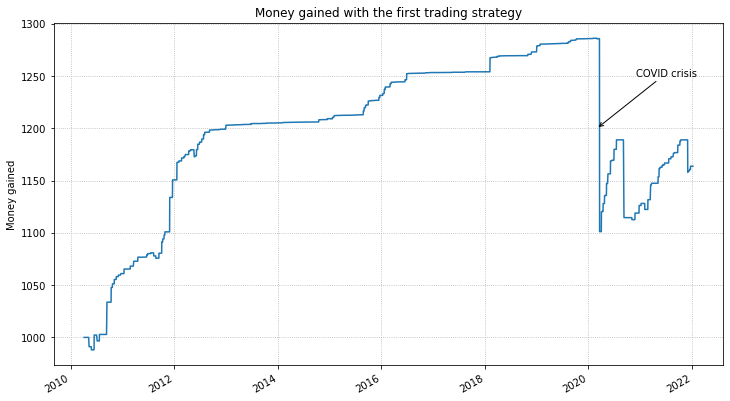

In [63]:
UX1['Money_STR1b'] = money

fig, ax = plt.subplots( figsize = ( 12, 7 ) )

UX1.Money_STR1b.plot( ax = ax )
ax.set_title( 'Money gained with the first trading strategy' )
ax.set_xlabel( '' )
ax.set_ylabel( 'Money gained' )
ax.grid( linestyle = 'dotted' )

ax.annotate( "COVID crisis", xy = ( '2020-03-01', 1200 ), xytext = ( '2020-12-01', 1250 ),
             arrowprops = dict( arrowstyle = "->" ) )

plt.show()

## Second strategy

In [64]:
conditions = [ ( UX1['diff_sim'] >  0 ),
               ( UX1['diff_sim'] <= 0 ) ]

choices = ['open','close']

UX1['open/close_2'] = np.select( conditions, choices, default = 0 )

In [65]:
conditions = [ ( UX1['diff_sim_real'] >  0 ),
               ( UX1['diff_sim_real'] <= 0 ) ]

choices = ['open','close']

UX1['open/close_real_2'] = np.select( conditions, choices, default = 0 )

In [66]:
money_2 = np.zeros( shape = ( len( UX1['PX_LAST'] ) ) )
money_2[0] = 1000
for x in range( 1, len( UX1['PX_LAST'] ) ):
    if UX1['open/close_2'].iloc[x] == 'open':
        money_2[x] = money_2[x-1] + 100 * ( ( UX1['PX_LAST'].iloc[x] - UX1['PX_LAST'].iloc[x+1] ) / UX1['PX_LAST'].iloc[x] )
    else:
        money_2[x] = money_2[x-1]

In [67]:
money_real_2 = np.zeros( shape = ( len( UX1['PX_LAST'] ) ) )
money_real_2[0] = 1000
for x in range( 1, len( UX1['PX_LAST'] ) ):
    if UX1['open/close_real_2'].iloc[x] == 'open':
        money_real_2[x] = money_real_2[x-1] + 100 * ( ( UX1['PX_LAST'].iloc[x] - UX1['PX_LAST'].iloc[x+1] ) / UX1['PX_LAST'].iloc[x] )
    else:
        money_real_2[x] = money_real_2[x-1]

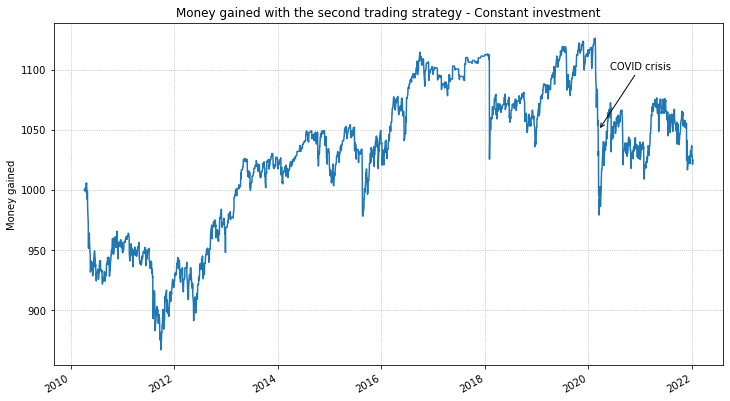

In [68]:
UX1['Money_STR2a'] = money_2

fig, ax = plt.subplots( figsize = ( 12, 7 ) )

UX1.Money_STR2a.plot( ax = ax )
ax.set_title( 'Money gained with the second trading strategy - Constant investment' )
ax.set_xlabel( '' )
ax.set_ylabel( 'Money gained' )
ax.grid( linestyle = 'dotted' )

ax.annotate( "COVID crisis", xy = ( '2020-03-15', 1050 ), xytext = ( '2020-06-01', 1100 ),
             arrowprops = dict( arrowstyle = "->" ) )

plt.show()

In [69]:
money_2 = np.zeros( shape = ( len( UX1['PX_LAST'] ) ) )
money_2[0] = 1000
for x in range( 1, len( UX1['PX_LAST'] ) ):
    if UX1['PX_LAST'].iloc[x] > 20:
        d1 = 1.5
        d2 = 15
    else:
        d1 = 15
        d2 = 1.5
    if UX1['open/close_2'].iloc[x] == 'open':
        money_2[x] = money_2[x-1] + money_2[x-1] / d1 * np.tanh(   UX1['diff_sim'].iloc[x] / d1 ) * ( ( UX1['PX_LAST'].iloc[x  ] - UX1['PX_LAST'].iloc[x+1] ) / UX1['PX_LAST'].iloc[x] )
    elif UX1['open/close_2'].iloc[x] == 'close':
        money_2[x] = money_2[x-1] + money_2[x-1] / d2 * np.tanh( - UX1['diff_sim'].iloc[x] / d2 ) * ( ( UX1['PX_LAST'].iloc[x+1] - UX1['PX_LAST'].iloc[x  ] ) / UX1['PX_LAST'].iloc[x] )
    else:
        money_2[x] = money_2[x-1]

In [70]:
money_real_2 = np.zeros( shape = ( len( UX1['PX_LAST'] ) ) )
money_real_2[0] = 1000
for x in range( 1, len( UX1['PX_LAST'] ) ):
    if UX1['PX_LAST'].iloc[x] > 20:
        d1 = 1.5
        d2 = 15
    else:
        d1 = 15
        d2 = 1.5
    if UX1['open/close_real_2'].iloc[x] == 'open':
        money_real_2[x] = money_real_2[x-1] + money_real_2[x-1] / d1 * np.tanh(   UX1['diff_sim_real'].iloc[x] / d1 ) * ( ( UX1['PX_LAST'].iloc[x  ] - UX1['PX_LAST'].iloc[x+1] ) / UX1['PX_LAST'].iloc[x] )
    elif UX1['open/close_real_2'].iloc[x] == 'close':
        money_real_2[x] = money_real_2[x-1] + money_real_2[x-1] / d2 * np.tanh( - UX1['diff_sim_real'].iloc[x] / d2 ) * ( ( UX1['PX_LAST'].iloc[x+1] - UX1['PX_LAST'].iloc[x  ] ) / UX1['PX_LAST'].iloc[x] )
    else:
        money_real_2[x] = money_real_2[x-1]

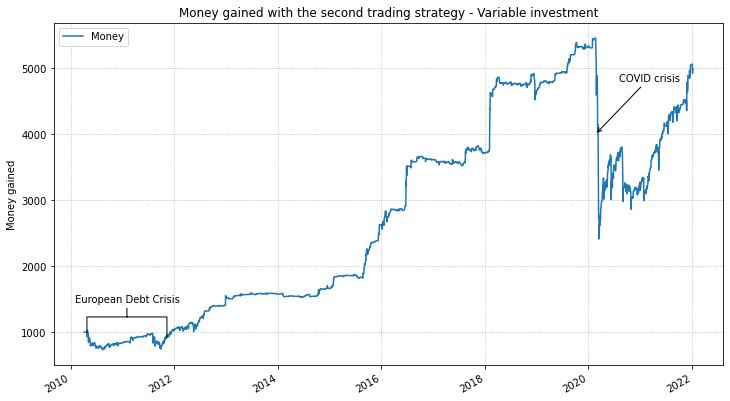

In [71]:
UX1['Money_STR2b'] = money_2

fig, ax = plt.subplots( figsize = ( 12, 7 ) )

UX1.Money_STR2b.plot( ax = ax, label = 'Money' )
ax.set_title( 'Money gained with the second trading strategy - Variable investment' )
ax.set_xlabel( '' )
ax.set_ylabel( 'Money gained' )
ax.grid( linestyle = 'dotted' )
ax.legend( loc = 'upper left' )

ax.annotate('European Debt Crisis', xy = ( '2011-02-01', 1200 ), xytext = ( '2011-02-01', 1500 ),
            ha='center', va='center',
            arrowprops=dict(arrowstyle='-[, widthB=4, lengthB=2' ) )
ax.annotate( "COVID crisis", xy = ( '2020-02-20', 4000 ), xytext = ( '2020-08-01', 4800 ),
             arrowprops = dict( arrowstyle = "->" ) )

plt.show()

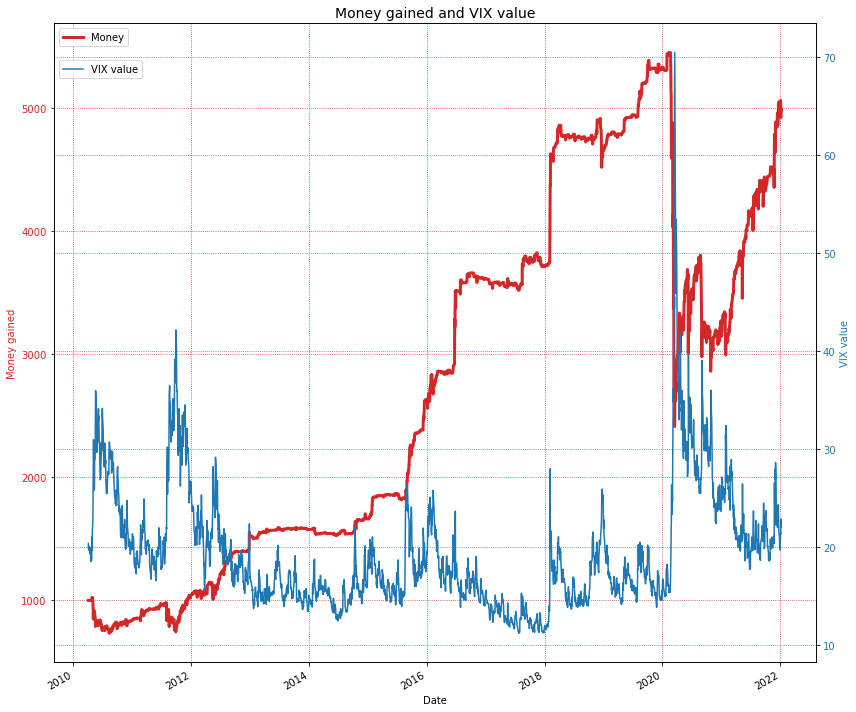

In [72]:
fig, ax1 = plt.subplots(figsize=(12, 10))

color = 'tab:red'
ax1.set_xlabel('')
ax1.set_ylabel('Money gained', color=color)
UX1.Money_STR2b.plot( ax = ax1, label = 'Money', c = color, lw = 3 )

ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(linestyle='dotted',color=color)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b %y"))
ax1.xaxis.set_minor_formatter(mdates.DateFormatter("%b %y"))
ax1.set_title('Money gained and VIX value', fontsize=14)
#plt.rcParams['font.size'] = '8'

ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('VIX value', color=color)

UX1.PX_LAST.plot( ax = ax2, label = 'VIX value', color = color )

ax2.tick_params(axis='y', labelcolor=color)
#ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95))
ax2.grid(linestyle='dotted', color=color)

fig.autofmt_xdate()
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [73]:
UX1['Money_Daily'] = UX1.Money_STR2b - UX1.Money_STR2b.shift( 1 )

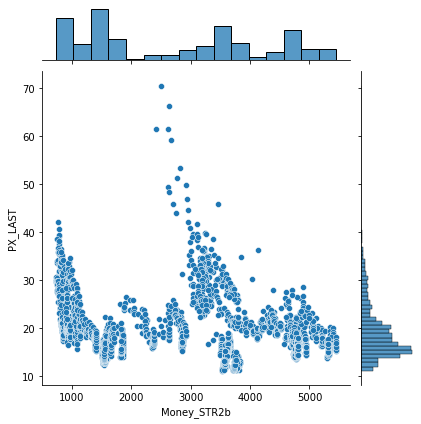

In [74]:
sns.jointplot( x = 'Money_STR2b', y = 'PX_LAST', data = UX1, kind = 'scatter')

(-30.0, 30.0)

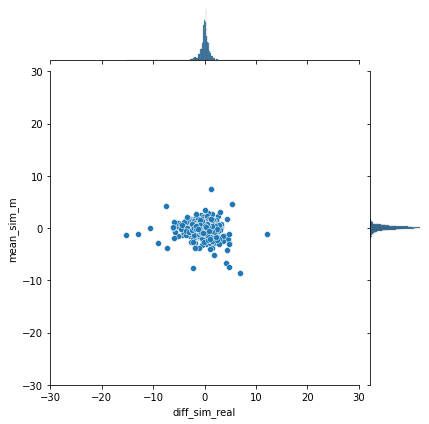

In [75]:
g = sns.jointplot( y = UX1.mean_sim_m - UX1.mean_sim_m.shift(-1), x = UX1['diff_sim_real'], kind = 'scatter' )
g.ax_marg_x.set_xlim(-30, 30)
g.ax_marg_y.set_ylim(-30, 30)

## Second future
Now we repete the previous analysis for the second future data (UX2) using the second strategy:

In [76]:
UX2['diff_sim'] = UX2['PX_LAST'] - UX2['mean_sim_m'].shift(-1)

conditions = [ ( UX2['diff_sim'] >  0 ),
               ( UX2['diff_sim'] <= 0 ) ]
choices = ['open','close']
UX2['open/close_2'] = np.select( conditions, choices, default = 0 )


UX2['diff_sim_real'] =  UX2['PX_LAST'] - UX2['PX_LAST'].shift(-1)
conditions = [ ( UX2['diff_sim_real'] >  0 ),
               ( UX2['diff_sim_real'] <= 0 ) ]

choices = ['open','close']

UX2['open/close_real_2'] = np.select( conditions, choices, default = 0 )

In [77]:
money_2 = np.zeros( shape = ( len( UX2['PX_LAST'] ) ) )
money_2[0] = 1000
for x in range( 1, len( UX2['PX_LAST'] ) ):
    if UX2['PX_LAST'].iloc[x] > 20:
        d1 = 1.5
        d2 = 15
    else:
        d1 = 15
        d2 = 1.5
    if UX2['open/close_2'].iloc[x] == 'open':
        money_2[x] = money_2[x-1] + money_2[x-1] / d1 * np.tanh(   UX2['diff_sim'].iloc[x] / d1 ) * ( ( UX2['PX_LAST'].iloc[x  ] - UX2['PX_LAST'].iloc[x+1] ) / UX2['PX_LAST'].iloc[x] )
    elif UX2['open/close_2'].iloc[x] == 'close':
        money_2[x] = money_2[x-1] + money_2[x-1] / d2 * np.tanh( - UX2['diff_sim'].iloc[x] / d2 ) * ( ( UX2['PX_LAST'].iloc[x+1] - UX2['PX_LAST'].iloc[x  ] ) / UX2['PX_LAST'].iloc[x] )
    else:
        money_2[x] = money_2[x-1]

In [78]:
money_real_2 = np.zeros( shape = ( len( UX2['PX_LAST'] ) ) )
money_real_2[0] = 1000
for x in range( 1, len( UX2['PX_LAST'] ) ):
    if UX2['PX_LAST'].iloc[x] > 20:
        d1 = 1.5
        d2 = 15
    else:
        d1 = 15
        d2 = 1.5
    if UX2['open/close_real_2'].iloc[x] == 'open':
        money_real_2[x] = money_real_2[x-1] + money_real_2[x-1] / d1 * np.tanh(   UX2['diff_sim_real'].iloc[x] / d1 ) * ( ( UX2['PX_LAST'].iloc[x  ] - UX2['PX_LAST'].iloc[x+1] ) / UX2['PX_LAST'].iloc[x] )
    elif UX2['open/close_real_2'].iloc[x] == 'close':
        money_real_2[x] = money_real_2[x-1] + money_real_2[x-1] / d2 * np.tanh( - UX2['diff_sim_real'].iloc[x] / d2 ) * ( ( UX2['PX_LAST'].iloc[x+1] - UX2['PX_LAST'].iloc[x  ] ) / UX2['PX_LAST'].iloc[x] )
    else:
        money_real_2[x] = money_real_2[x-1]

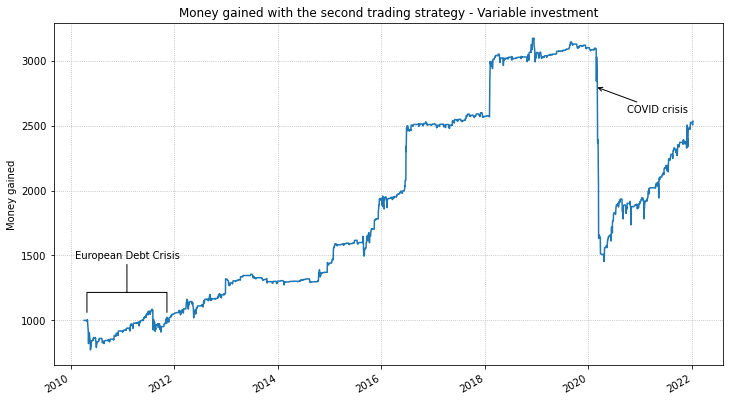

In [79]:
UX2['Money_STR2b'] = money_2

fig, ax = plt.subplots( figsize = ( 12, 7 ) )

UX2.Money_STR2b.plot( ax = ax )
ax.set_title( 'Money gained with the second trading strategy - Variable investment' )
ax.set_xlabel( '' )
ax.set_ylabel( 'Money gained' )
ax.grid( linestyle = 'dotted' )

ax.annotate('European Debt Crisis', xy = ( '2011-02-01', 1200 ), xytext = ( '2011-02-01', 1500 ),
            ha='center', va='center',
            arrowprops=dict(arrowstyle='-[, widthB=4, lengthB=2' ) )
ax.annotate( "COVID crisis", xy = ( '2020-02-20', 2800 ), xytext = ( '2020-10-01', 2600 ),
             arrowprops = dict( arrowstyle = "->" ) )

plt.show()

## Comparison between first and second strategy

### Percentage of earnings

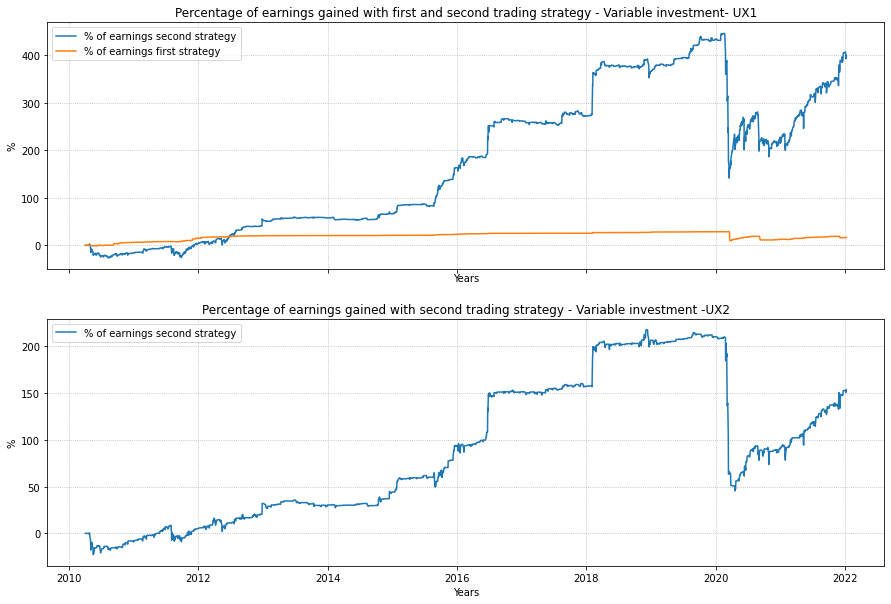

In [86]:
invested = 1000
# UX1
perc_11   = 100*(UX1['Money_STR1b'] - invested) / invested
perc_12   = 100*(UX1['Money_STR2b'] - invested) / invested

# UX2
perc_22   = 100*(UX2['Money_STR2b'] - invested) / invested

#fig, ax = plt.subplots(ncols=2, figsize=(24,10))
fig,ax = plt.subplots(nrows=2,figsize=(15,10), sharex=True)

ax[0].plot( perc_12, label = '% of earnings second strategy' )
ax[0].plot( perc_11, label = '% of earnings first strategy' )
ax[0].set_title( 'Percentage of earnings gained with first and second trading strategy - Variable investment- UX1' )
ax[0].set_xlabel( 'Years' )
ax[0].set_ylabel( '%' )
ax[0].grid( linestyle = 'dotted' )
ax[0].legend( loc = 'upper left' )

ax[1].plot( perc_22, label = '% of earnings second strategy' )
#ax[1].plot( perc_21, label = '% of earnings first strategy' )
ax[1].set_title( 'Percentage of earnings gained with second trading strategy - Variable investment -UX2' )
ax[1].set_xlabel( 'Years' )
ax[1].set_ylabel( '%' )
ax[1].grid( linestyle = 'dotted' )
ax[1].legend( loc = 'upper left' )

### Gained money with respect to the day before normalized

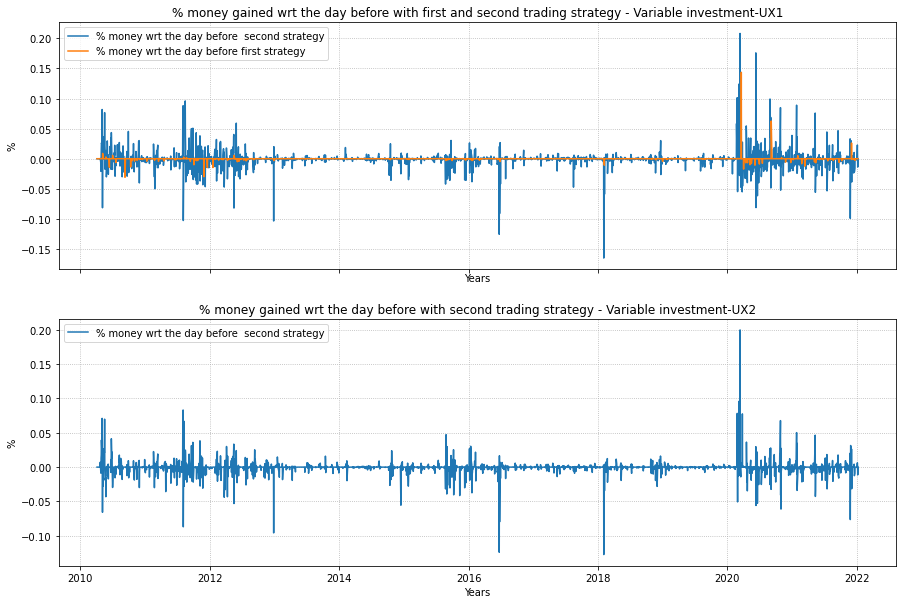

In [81]:
# delta normalized bw money[t] and money[t-1]
# UX1
delta_11   = (UX1['Money_STR1b'] - UX1['Money_STR1b'].shift(-1)) / UX1['Money_STR1b']
delta_12   = (UX1['Money_STR2b'] - UX1['Money_STR2b'].shift(-1)) / UX1['Money_STR2b']

# UX2
delta_22   = (UX2['Money_STR2b'] - UX2['Money_STR2b'].shift(-1)) / UX2['Money_STR2b']

fig,ax = plt.subplots(nrows=2,figsize=(15,10), sharex=True)

ax[0].plot( delta_12, label = '% money wrt the day before  second strategy' )
ax[0].plot( delta_11, label = '% money wrt the day before first strategy' )
ax[0].set_title( '% money gained wrt the day before with first and second trading strategy - Variable investment-UX1' )
ax[0].set_xlabel( 'Years' )
ax[0].set_ylabel( '%' )
ax[0].grid( linestyle = 'dotted' )
ax[0].legend( loc = 'upper left' )

ax[1].plot( delta_22, label = '% money wrt the day before  second strategy' )
#ax[1].plot( delta_11, label = '% money wrt the day before first strategy' )
ax[1].set_title( '% money gained wrt the day before with second trading strategy - Variable investment-UX2' )
ax[1].set_xlabel( 'Years' )
ax[1].set_ylabel( '%' )
ax[1].grid( linestyle = 'dotted' )
ax[1].legend( loc = 'upper left' )

### Standard deviation (computed month by month)

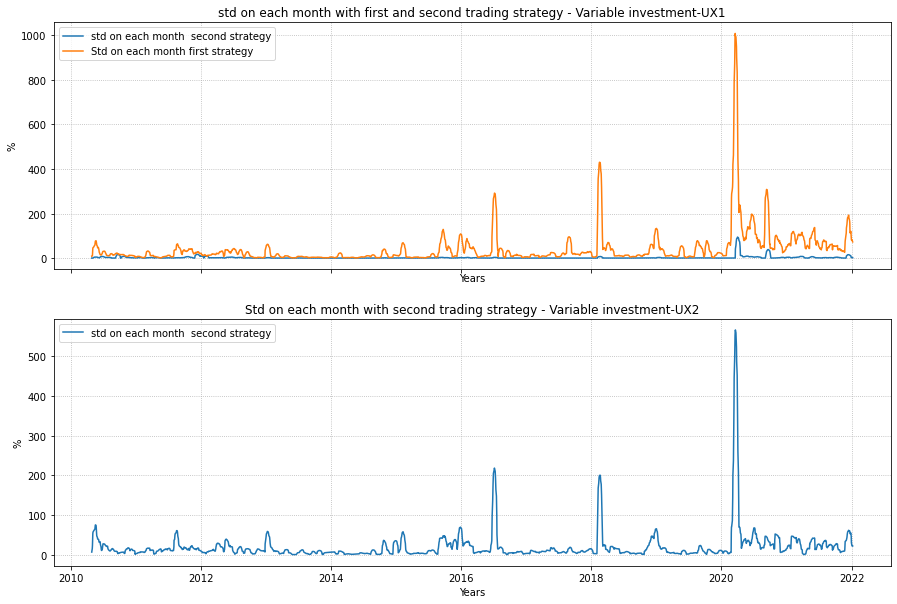

In [83]:
fig,ax = plt.subplots(nrows=2,figsize=(15,10), sharex=True)

ax[0].plot( UX1['Money_STR1b'].rolling(20).std(),
           label = 'std on each month  second strategy' )
ax[0].plot( UX1['Money_STR2b'].rolling(20).std(),
           label = 'Std on each month first strategy' )
ax[0].set_title( 'std on each month with first and second trading strategy - Variable investment-UX1' )
ax[0].set_xlabel( 'Years' )
ax[0].set_ylabel( '%' )
ax[0].grid( linestyle = 'dotted' )
ax[0].legend( loc = 'upper left' )

ax[1].plot( UX2['Money_STR2b'].rolling(20).std(),
           label = 'std on each month  second strategy' )
#ax[1].plot( delta_11, label = '% money wrt the day before first strategy' )
ax[1].set_title( 'Std on each month with second trading strategy - Variable investment-UX2' )
ax[1].set_xlabel( 'Years' )
ax[1].set_ylabel( '%' )
ax[1].grid( linestyle = 'dotted' )
ax[1].legend( loc = 'upper left' )